Author: Eli Miranda

Date: 08/27/2024

Email: mr.miranda93@yahoo.com 

Auto Insurance Retention Capstone

__________________________________________________________________________________________________________________________________________

## Table of Contents

[1. - Introduction](#part-1)

Introduction

[2. - Key Question(s)](#part-2)

Key Question(s)

[3. - Loading Data & Relevant Libraries/Packages](#part-3)

Loading Data & Relevant Libraries/Packages 

[4. - Data Cleaning](#part-4)

    A. Shape, Head & Info

    B. Null/Missing Data
        - Missing acct_suspd-date
        - Missing City
        - Missing Counties
        - Missing home_market_value
        
    C. Columns and/or Row Drops

[5. - Preliminary EDA](#part-5)

    A. Preliminary EDA Subplots

    B. Subplot Findings

[6. - Feature Engineering/In-Depth EDA](#part-6)

    A. Dummies

    B. Dummies Columns and/or Row Drops

    C. Collinearity & MultiCollinearity
        - county MultiCollinearity
        - marital-status MultiCollinearity
        - Dataframe MultiCollinearity
        Heatmap 1
    
    D. In-Depth EDA
        - length_of_residence EDA
        - income EDA
        - avg_home_market_value EDA
        - Possible Feature Engineering age_in_years

[7. - Final Sense Check & Heatmap](#part-7)

        Heatmap 2

[8. - Baseline Modeling ](#part-8)

        - Test/Train Split
        - Logistic Model
        - XG Boost Model
        - Decision Tree Model
        
[9. - Model Optimization ](#part-9)

        - Logistic Model Optimization
        - XG Boost Model Optimization
        - Decision Tree Model Optimization
        - SVC Model Optimization
        - KNN Model Optimization
        - Model Optimization Unified Results

[10. - Model Evalution ](#part-10)

        - Classifcation Report & Confusion Matrix Evaluation

[11. - Conclusion & Recommendation](#part-11)

        


__________________________________________________________________________________________________________________________________________

## 1. Introduction
<a class="anchor" id="part-1"></a>

The goal of this project is to build a machine learning model that will identify the likelihood of customer retention based on aspects of their demographic. Identifying aspects of customer demographics associated with increased retention will help to guide insurance carriers' marketing efforts and reevaluate underwriting premium practices. 

__________________________________________________________________________________________________________________________________________

## 2. Key Question(s)
<a class="anchor" id="part-2"></a>

Using machine learning, how can we accurately and consistantly identify the likelihood of customer retention based on aspects of their demographic?


We will strive to answer this question with the analysis and exploration of the insight discovered with the analysis of the auto insurance churn data set from Kaggle: https://www.kaggle.com/datasets/merishnasuwal/auto-insurance-churn-analysis-dataset?select=autoinsurance_churn.

DISCLAIMER: This data set is generated and is fictitious. Thus, the accuracy of the models you will see in the later sections are expected to be low. There are other limits to this data set that will be discussed further in the Preliminary EDA and In-Depth EDA. In summary, this project will serve as a framework for future endeavours involving real world data.  csv

__________________________________________________________________________________________________________________________________________

## 3. Loading Data & Relevant Libraries/Packages 
<a class="anchor" id="part-3"></a>

Below we will import packages that may be needed for this notebook. 

We will also feed our CSV file into the DataFrame that we will call df_raw.

In [282]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

# Statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import pearsonr

# Machine Learning Libraries
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline
from sklearn.pipeline import Pipeline

# Utilities
from itertools import product
import time

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
# Read the CSV file 'auto_insurance_churn.csv' into the DataFrame df_raw
df_raw = pd.read_csv('Data/auto_insurance_churn.csv')

__________________________________________________________________________________________________________________________________________

## 4. Data Cleaning
<a class="anchor" id="part-4"></a>

Here we will explore the shape, columns, and rows of the DataFrame. We will look for null values and the relevance of the rows and columns to determine if any rows and/or columns need to be dropped. Additionally, we may explore imputation for columns with null/missing values. 

### A. Shape, Head & Info

In [19]:
# Print the shape of the dataframe. 
df_raw.shape

(1680909, 22)

This DataFrame consists of 22 columns and 1,680,909 rows. 

In [21]:
# Display the DataFrame df_raw, first five row & last five rows of the dataframe are printed. 
display(df_raw)

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


In [22]:
df_raw.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

Based on the presence of primary key columns such as individual_id & address_id as well as features that include binary row values, it appears the source for this DataFrame has already done some cleaning. 

However, we will continue to explore the DataFrame to fine tune it for our purpose 



The column labels make sense for the columns based on their respective row values, so we will keep the labels as they are f now. 



Let's check for duplicate row values. 

In [24]:
# outputs a True/False array, True whenever it's duplicate, False when it isn't (basically marks whether a row appears more than once or not)
df_raw.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1680904    False
1680905    False
1680906    False
1680907    False
1680908    False
Length: 1680909, dtype: bool

In [25]:
# the sum of the duplicated() function gives the number of rows that appear more once
df_raw.duplicated().sum()

0

There are no duplicate rows.

In [27]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

Findings:

Based on the info above, we see 8 out of 22 columns are of the object dtype. We have 2 int64 object dtype columns and 12 float64 dtype columns. 

There are six columns that refer to locations that may have strong collinearity, so we must consider dropping some of them. Of the columns we keep, some may need to be converted into numerical dtypes. The location columns are:

'latitude', 'longitude', 'city', 'state', 'county', 


The marital_status and home_market_value are object dtype, but may yield some interesting features, so we will investigate these further to determine if they will need dummies or need to be dropped. 

There are three object dtype columns with date values that may either need to be dropped or converted into datetime dtype. From a business sense and the fact that we only have Churn data for 2022 and a handful of rows for 2021, we will not be able to do any type of forecasting/seasonality related models, so we will drop the 'cust_orig_date' column. Additionally, the 'date_of_birth' column is not needed as we already have an 'age_in_years' column. The 'acct_suspd_date', has a direct relation to Churn, so we will analyze the acct_suspd_date column to determine if it needs to be converted or dropped. 

We will drop all columns that need to be dropped after exploring null/missing data in each column. 

Some of the float64 and int64 columns contain binary data, just with an added decimal present. Let's convert these columns into true usable binaries. 

The 'has_children', 'home_owner', 'college_degree', 'good_credit', and 'Churn' columns will be converted to int32 to help with memory usage during modeling.

In [29]:
# df_raw dtype float64 columns to int32
df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']] = df_raw[['has_children', 'home_owner', 'college_degree', 'good_credit', 'Churn']].astype('int32')

Let's review the info of the DataFrame to confirm the conversions took. 

In [31]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  int32  
 14  length_of_residence  1680909 non-null  float64
 15

To save more on memory usage, we will convert all float64 dtypes to float32 dtypes. 


In [33]:
# Identify all columns with float64 dtype
float64_columns = df_raw.select_dtypes(include='float64').columns

# Convert these columns to float32
df_raw[float64_columns] = df_raw[float64_columns].astype('float32')

Let's sense check this conversion as well. 

In [35]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float32
 1   address_id           1680909 non-null  float32
 2   curr_ann_amt         1680909 non-null  float32
 3   days_tenure          1680909 non-null  float32
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float32
 8   longitude            1427190 non-null  float32
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float32
 13  has_children         1680909 non-null  int32  
 14  length_of_residence  1680909 non-null  float32
 15

All the conversion took. 


### B. Null/Missing Data

Next we will explore the null/missing value count & percentage for each column. 

In [39]:
# Check the number of missing values in each column of df_raw
df_raw.isna().sum(axis=0)

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

The 'latitue', 'longitude', 'county', 'home_market_value' and 'acct_suspd_date' columns are the only columns that have null values. 

Let's calculate what percentage of null values make up the data for their respective columns.

In [41]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       5.490244
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
dtype: float64

Findings: 

The list of columns that have null values are: 'latitude', 'longitude', 'city', 'county', 'home_market_value', and 'acct_suspd_date'. To remedy each column, we need to consider if the data contained in each column is standalone or if they contain data similar to other columns(including columns without null values), just on a different scale or a different aspect. Ex. 'latitude', 'longitude', 'city', 'county' and 'state' all refer to location vs 'home_market_value' would be standalone. 

We see that 'latitude' and 'longitude' each have ~15% of their row values comprised of null values. However, from a business sense, these columns do not provide any value, so they will be dropped. 

'City' and 'county' each have ~0.71% of their values as null. For these columns, we are missing a very small amount of data, so we will drop the rows that have null values for 'city' and 'county'. 

home_market_value has ~5.5 of its value as null. Since this is a small percentage, we will explore where we can reasonable input the nulls or have to drop rows or the whole column. 

Lastly, 'acct_suspd_date' has ~88.49% of its value as null. Since this column represents the dates that a policy was suspended or canceled and has such a large amount of null data, we cannot drop the column outright. Instead, we will explore the significance of this column and consider dropping the ~11% comprised of rows that do have values.

Since 'acct_suspd_date' has the largest percentage of null values, we will start exploring this column and its relationship with Churn by getting the unique values in each column.

#### - Missing acct_suspd_date

In [44]:
# Get the unique values in the 'Churn' column of df_raw
df_raw['Churn'].unique()

array([0, 1])

For the 'Churn', the row values appear to be binary, where 1 (True) presents the presence of churn, regardless if the account was voluntarily or involuntarily suspended/canceled. The 0 (false) represents the absence of churn. 

In [46]:
# Get the unique values in the 'acct_suspd_date' column of df_raw
df_raw['acct_suspd_date'].unique()

array([nan, '2021-12-22', '2022-12-01', '2021-12-20', '2022-03-12',
       '2021-12-29', '2022-11-22', '2022-06-12', '2022-05-19',
       '2022-01-28', '2022-01-15', '2022-06-24', '2022-05-28',
       '2022-04-25', '2022-07-31', '2022-06-21', '2022-05-23',
       '2022-03-15', '2022-05-11', '2022-03-18', '2021-12-16',
       '2022-05-17', '2022-07-14', '2022-08-16', '2022-04-14',
       '2022-11-09', '2022-11-28', '2022-08-28', '2021-12-11',
       '2022-02-09', '2021-12-27', '2022-01-25', '2022-08-19',
       '2022-09-18', '2022-05-31', '2022-09-23', '2022-10-10',
       '2022-02-27', '2022-10-30', '2022-02-28', '2022-01-16',
       '2022-01-24', '2022-07-17', '2022-02-24', '2022-07-01',
       '2022-08-18', '2022-10-09', '2022-02-10', '2022-08-02',
       '2022-05-15', '2022-02-13', '2022-04-21', '2022-04-18',
       '2022-08-27', '2022-07-26', '2022-09-19', '2022-06-08',
       '2022-01-12', '2021-12-31', '2022-08-30', '2022-05-16',
       '2022-10-29', '2022-03-19', '2022-02-01', '

The values for the 'acct_suspd_date' column are the dates where an account was suspended/canceled, which is synonymous with churn. This column does specify whether the account was suspended/canceled voluntarily or involuntarily.


Since both the Churn column and acct_suspd_date appear to represent aspects of churn, let's explore the sum and/or count of the row values where churn is present. We will do a sum 'for C'hurn since it is binary and a count 'for acct_suspd_'date since null values are present in the colu. 



Remember: The data in this DataFrame is composed of data from 2022 with a handful of dates from 2021. Thus, any study of forecasting/seasonality will be ruled out as a Dataframe with several years worth of data would be needed for that type of study. Therefore, all date columns will be dropped.

In [48]:
# Calculate the sum of the 'Churn' column
df_raw['Churn'].sum()

193456

In [49]:
# Count the non-null values in the 'acct_suspd_date' column
df_raw['acct_suspd_date'].count()

193456

The sum for 'Churn' and the count for 'acct_suspd_date' have the same value of 193456. This is confirmation that they both are aspects of the presence of churn in the Dataframe. We may need to consider dropping the 'acct_suspd_date' column during Preliminary EDA. For now we will keep it as we may want to explore any relationships that may exist for 'acct_suspd_date', but convert it to 'month' to group the dates in a way that is more manageable.

In [51]:
# Convert multiple columns to datetime dtype with explicit format
df_raw['acct_suspd_date'] = pd.to_datetime(df_raw['acct_suspd_date'], format='%Y-%m-%d')

In [52]:
# Extract the month component and create a new column 'month'
df_raw['month'] = df_raw['acct_suspd_date'].dt.month

Let's see if the new 'month' column was created and confirm the proper values were created. 

In [54]:
# Display information about df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   individual_id        1680909 non-null  float32       
 1   address_id           1680909 non-null  float32       
 2   curr_ann_amt         1680909 non-null  float32       
 3   days_tenure          1680909 non-null  float32       
 4   cust_orig_date       1680909 non-null  object        
 5   age_in_years         1680909 non-null  int64         
 6   date_of_birth        1680909 non-null  object        
 7   latitude             1427190 non-null  float32       
 8   longitude            1427190 non-null  float32       
 9   city                 1668842 non-null  object        
 10  state                1680909 non-null  object        
 11  county               1668842 non-null  object        
 12  income               1680909 non-null  float32       
 1

In [55]:
# Get the unique values in the 'month' column of df_raw
df_raw['month'].unique()

array([nan, 12.,  3., 11.,  6.,  5.,  1.,  4.,  7.,  8.,  2.,  9., 10.])

The 'month' column's creation was successful, and it contains the appropriate numerical values for each month in the year. 

Next we will work on the location data related columns that have null values, which are 'latitude', 'longitude', 'city', and 'county'. We will also look at the 'state' column to see how it relates to the rest of the location columns. 

#### - Missing City

In [59]:
# Get the unique values in the 'city' column of df_raw
df_raw['city'].unique()

array(['Kaufman', 'Grand Prairie', 'Dallas', 'Arlington', 'Fort Worth',
       'Carrollton', 'Allen', 'Bedford', 'The Colony', 'Mckinney',
       'Irving', 'Mesquite', 'Hurst', 'Garland', 'Sachse', 'Euless',
       'Plano', 'Frisco', 'Grapevine', 'Cedar Hill', 'Keller', nan,
       'Justin', 'Wylie', 'Aledo', 'Waxahachie', 'Seagoville',
       'North Richland Hills', 'Desoto', 'Roanoke', 'Southlake',
       'Lancaster', 'Kemp', 'Mansfield', 'Richardson', 'Rice',
       'Caddo Mills', 'Red Oak', 'Weatherford', 'Flower Mound', 'Denton',
       'Ennis', 'Midlothian', 'Coppell', 'Sanger', 'Aubrey', 'Burleson',
       'Duncanville', 'Crowley', 'Rockwall', 'Rowlett', 'Colleyville',
       'Lewisville', 'Balch Springs', 'Argyle', 'Lake Dallas', 'Haslet',
       'Terrell', 'Forney', 'Haltom City', 'Azle', 'Addison', 'Italy',
       'Springtown', 'Joshua', 'Princeton', 'Anna', 'Little Elm',
       'Crandall', 'Ponder', 'Royse City', 'Valley View', 'Ferris',
       'Scurry', 'Farmersville', 'Pro

There seems to be a lot of unique cities in this column. Let's get an exact count. 

In [61]:
# Count the total number of unique values in the 'city' column
len(df_raw['city'].unique())

96

The 'city' column has many unique values, so this column will be dropped in favor of using the 'county' column for any location related analysis. 

In [63]:
# Get the unique values in the 'state' column of df_raw
df_raw['state'].unique()

array(['TX'], dtype=object)

Since all the data in the Dataframe is from the state of Texas, the 'state' column does not add value for analysis and will be dropped in the Column Drops section. 

#### - Missing Counties

In [66]:
# Get the unique values in the 'county' column of df_raw
df_raw['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', nan, 'Parker',
       'Ellis', 'Navarro', 'Hunt', 'Johnson', 'Rockwall', 'Cooke',
       'Grayson', 'Hill'], dtype=object)

The 'county' column has a modest amount of unique values, so we will keep it for now and explore the significance of this column further before dropping it. 

#### - Missing home_market_value

Next let's explore 'home_market_value'. 

In [70]:
# Get the unique values in the 'home_market_value' column of df_raw
df_raw['home_market_value'].unique()

array(['50000 - 74999', '75000 - 99999', '175000 - 199999',
       '225000 - 249999', '125000 - 149999', '100000 - 124999',
       '25000 - 49999', '150000 - 174999', nan, '200000 - 224999',
       '250000 - 274999', '275000 - 299999', '400000 - 449999',
       '300000 - 349999', '1000000 Plus', '1000 - 24999',
       '750000 - 999999', '350000 - 399999', '500000 - 749999',
       '450000 - 499999'], dtype=object)

In [71]:
# Count the total number of unique values in the 'home_market_value' column
len(df_raw['home_market_value'].unique())

20

In [72]:
# Get the percentage of each unique value in the 'home_market_value' column
df_raw['home_market_value'].value_counts(normalize=True) * 100

home_market_value
75000 - 99999      19.291109
100000 - 124999    17.470035
50000 - 74999      13.998664
125000 - 149999    13.287608
150000 - 174999     9.309068
175000 - 199999     6.142804
25000 - 49999       5.485002
200000 - 224999     4.226805
225000 - 249999     2.846301
250000 - 274999     1.850030
1000 - 24999        1.539887
300000 - 349999     1.199970
275000 - 299999     1.136834
350000 - 399999     0.676687
500000 - 749999     0.570179
400000 - 449999     0.387380
450000 - 499999     0.279047
750000 - 999999     0.185632
1000000 Plus        0.116957
Name: proportion, dtype: float64

The 'home_market_value' has a reasonable number of unique values, all of which are numerical ranges. These ranges cannot be used in models as they are, even though they are numerical, they function categorically, which is why the column is an object dtype. In order to make this column's row values numerical in the sense that it can be used in a model, we will need to split the row values into 'upper' and 'lower' bound columns. Then we can either calculate the average or midpoint of the two columns to generate an 'avg_home_market_value' column or just work with the 'lower' bound column since there are rows that do no have an 'upper' bound. For example, rows that contain '1000000 Plus' values will also need to be dropped. In this case we will just with the 'lower' bound column. However, there is the issue of null values that will still remain even after extracting the 'lower' bound. For those nulls values with the mean.

In [74]:
# Will consider the 'lower' bound as the value/almost as a "category"
count_by_home_market_value = df_raw.groupby('home_market_value').count().reset_index()
# Considering the lower range as label and removing "Plus"
count_by_home_market_value['label'] = count_by_home_market_value['home_market_value'].str.split('-').str[0]
count_by_home_market_value['label'] = count_by_home_market_value['label'].str.extract('(\d+)').astype(int)

# Extract the lower bound and then fill null values with mean
df_raw['home_market_value'] = df_raw['home_market_value'].str.split('-').str[0].str.extract('(\d+)').fillna(count_by_home_market_value['label'].mean()).astype(int)

Let's do a sense check of the 'home_market_value' column to see if our changes took. 

In [76]:
# Display the first 30 rows of the 'city' and 'home_market_value' columns
df_raw[['city','home_market_value']].head(30)

,city,home_market_value
0,Kaufman,50000
1,Grand Prairie,50000
2,Dallas,75000
3,Arlington,175000
4,Fort Worth,225000
5,Dallas,125000
6,Carrollton,100000
7,Allen,125000
8,Bedford,50000
9,Dallas,25000


Based on the rows above, we can see that the home_market_value row values are not 1:1 with a unique city. In fact, there is more than one unique 'home_market_values' in Fort Worth. However, we do not have enough insight into the data to deteremine why this is the case. However, from a real-world perspective, it is likely original values wer pulled from different neighborhoods with a city. 

All in all, the range row values have been converted into a 'lower' bound value and all the null values have been filled with the mean. 

Let's do a sense check to confirm the null value rows have been removed.

In [79]:
# Calculate the percentage of missing values in each column of df_raw
100 * (df_raw.isna().sum(axis=0) / df_raw.shape[0])

individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       0.000000
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
month                  88.490989
dtype: float64

At this point, we have resolved all null value conflicts apart from any column and row that will be dropped in a later section.


### C. Columns and/or Row Drops

All the following columns will be dropped as they are either redundant, they have too many unique values to be of statistical significance or do not add any value in a business sense. 

'individual_id','address_id','cust_orig_date','date_of_birth','latitude','longitude','city','state','acct_suspd_date'

In [83]:
# Create a new DataFrame df_auto_churn_clean by dropping specified columns from df_raw
df_auto_churn_clean = df_raw.drop(['individual_id','address_id','cust_orig_date','date_of_birth',
                                    'latitude','longitude','city','state','acct_suspd_date'], axis=1)

Next, we will move on to doing some Preliminary EDA.

## 5. Preliminary EDA
<a class="anchor" id="part-5"></a>

In [86]:
# let's check missing values
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt            0.000000
days_tenure             0.000000
age_in_years            0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       0.000000
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
Churn                   0.000000
month                  88.490989
dtype: float64

Since the 'county' and 'month' have high a high percentage of null values we will drop them.

In [88]:
# Drop 'county' and 'month' columns
df_auto_churn_clean = df_auto_churn_clean.drop(['county', 'month'], axis=1)

Now let's take a look at the head of the DataFrame to make sure all the columns and row values are in good order.

In [90]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,818.877991,1454.0,44,22500.0,1,15.0,Married,50000,1,1,1,0
1,974.199158,1795.0,72,27500.0,0,2.0,Single,50000,1,0,0,0
2,967.375122,4818.0,55,42500.0,0,10.0,Married,75000,1,0,0,0
3,992.409546,130.0,53,125000.0,1,6.0,Married,175000,1,0,1,1
4,784.633484,5896.0,50,87500.0,1,4.0,Married,225000,1,1,1,0


Let's check that all the desired columns have been dropped and that there are no object dtype columns remaining except for 'home_market_value' and 'marital status'.

In [92]:
# Display summary information about the DataFrame, including column names, non-null counts, and data types
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   curr_ann_amt         1680909 non-null  float32
 1   days_tenure          1680909 non-null  float32
 2   age_in_years         1680909 non-null  int64  
 3   income               1680909 non-null  float32
 4   has_children         1680909 non-null  int32  
 5   length_of_residence  1680909 non-null  float32
 6   marital_status       1680909 non-null  object 
 7   home_market_value    1680909 non-null  int32  
 8   home_owner           1680909 non-null  int32  
 9   college_degree       1680909 non-null  int32  
 10  good_credit          1680909 non-null  int32  
 11  Churn                1680909 non-null  int32  
dtypes: float32(4), int32(6), int64(1), object(1)
memory usage: 89.8+ MB


All the column dtypes are as expected.

Now we will explore the distribution of all the numerical dtype columns in the DataFrame by plotting a grid of subplots.

### A. Preliminary EDA Subplots

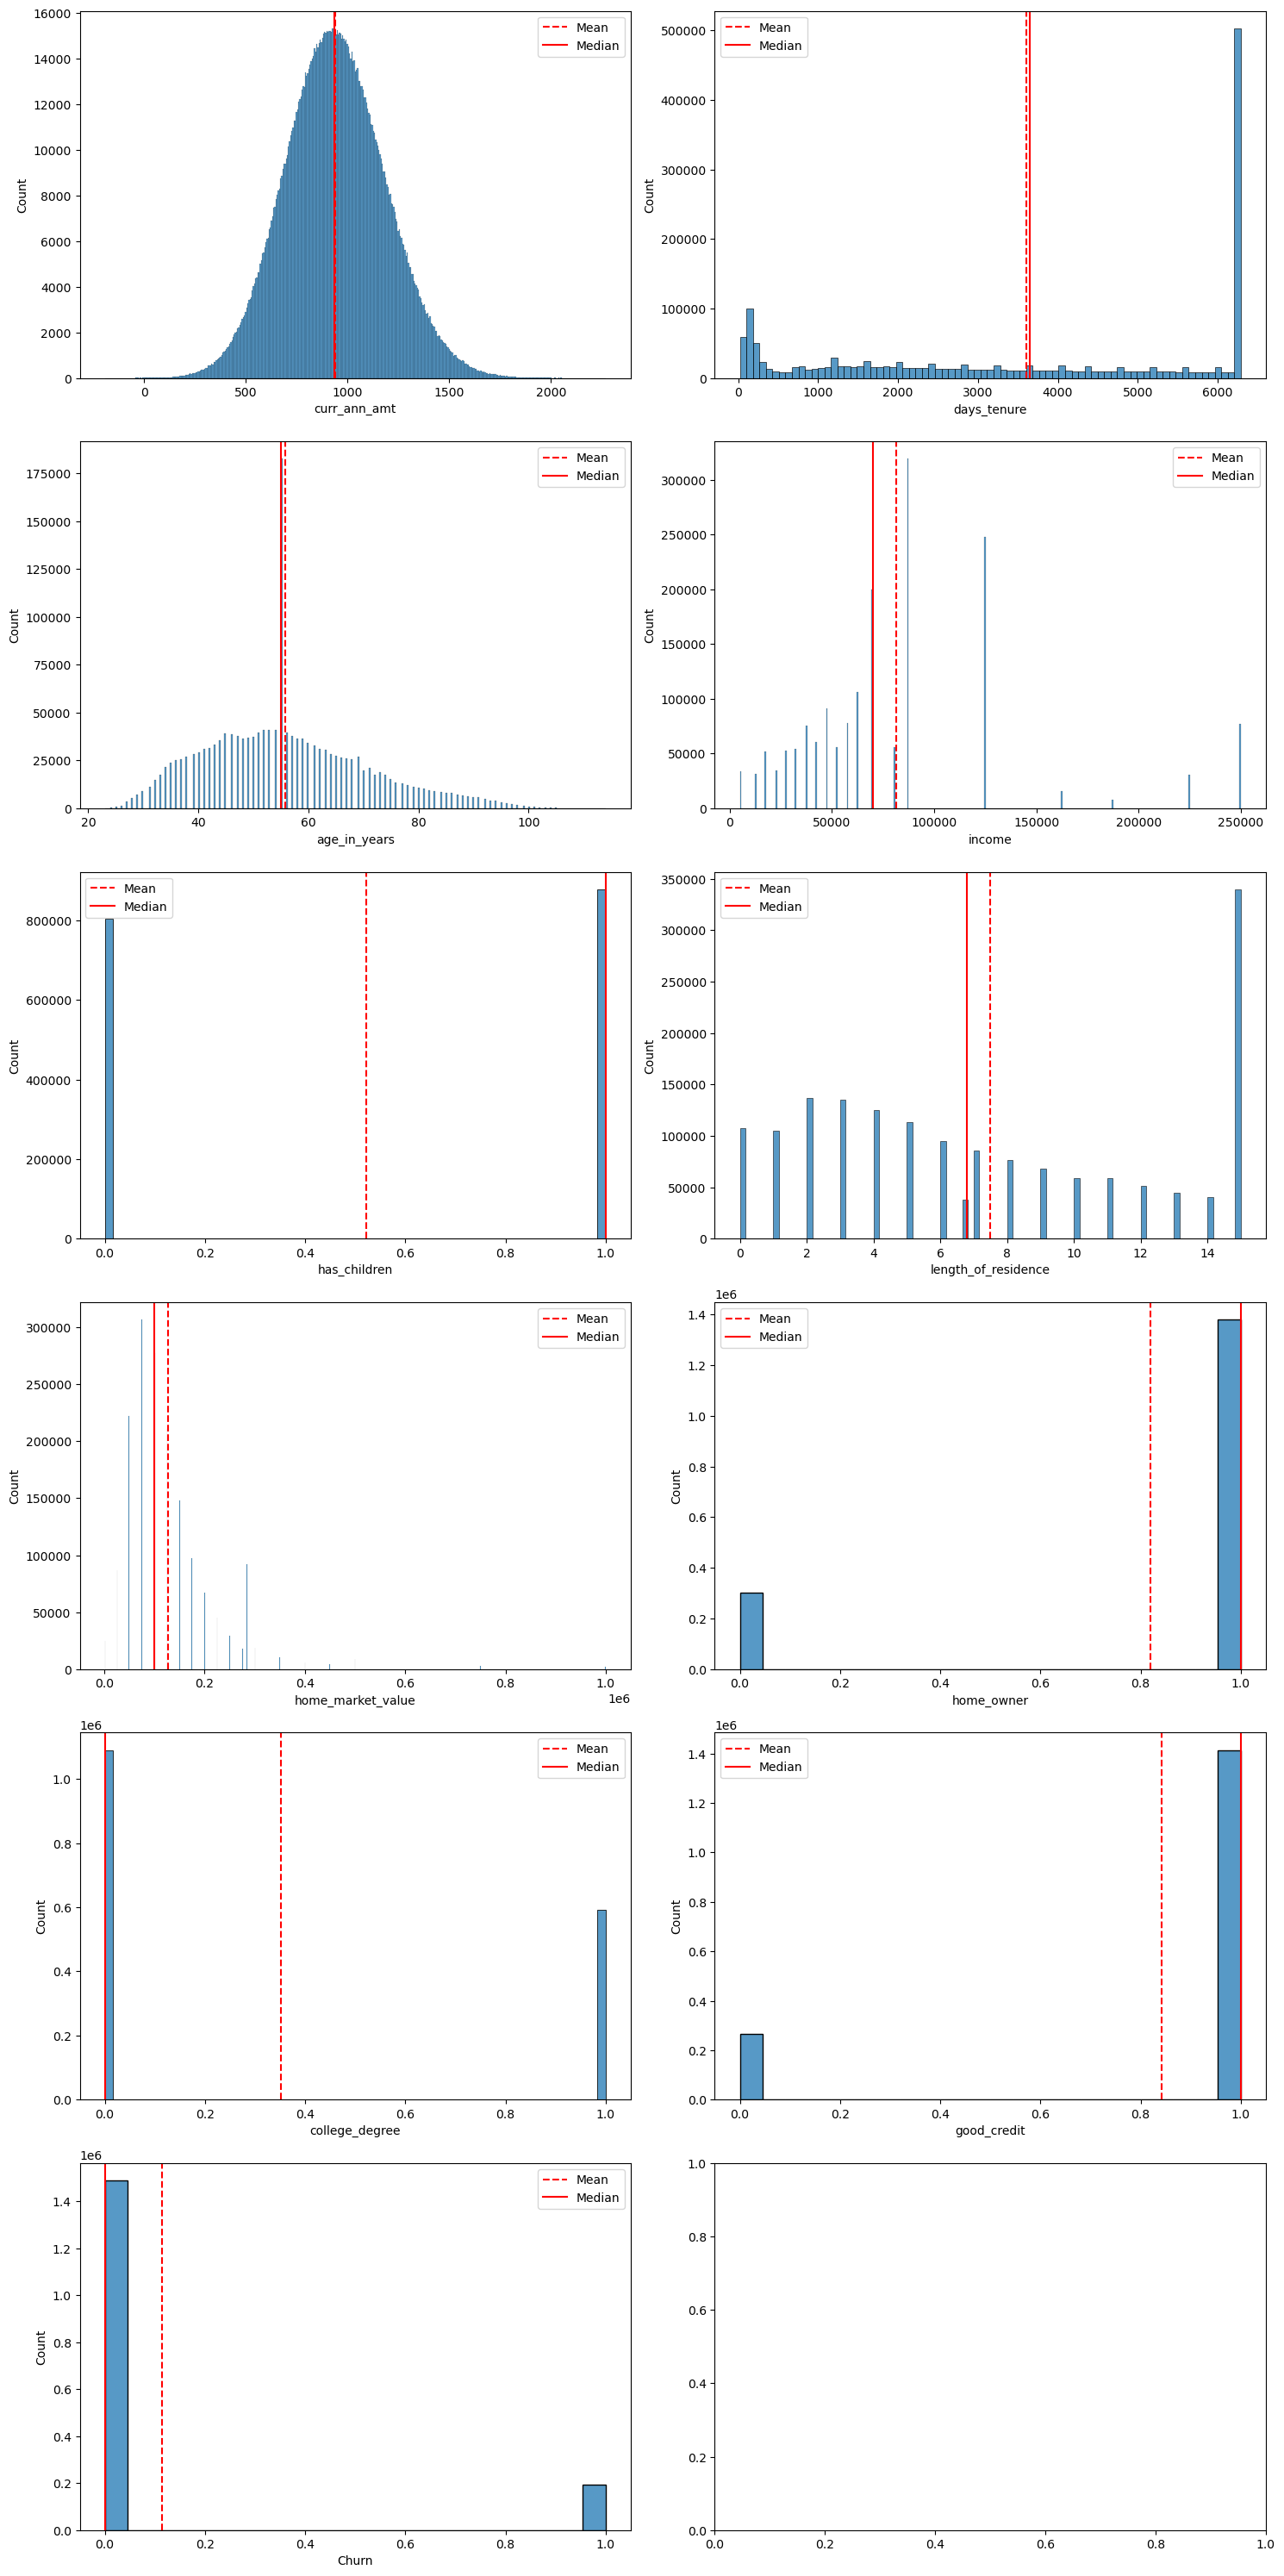

In [96]:
# Set up grid of subplots
plt.subplots(6, 2, figsize=(15, 30))

# Initialize counter
plot_num = 1

# Loop through column names in DataFrame
for col in df_auto_churn_clean.select_dtypes(exclude='object').columns:
    if not col.startswith('county_'):
        var = df_auto_churn_clean[col]
        var_mean = var.mean()
        var_median = var.median()

        plt.subplot(6, 2, plot_num)
        sns.histplot(var, kde=False)
        plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
        plt.axvline(var_median, c='r', label='Median')
        plt.legend()

        plot_num += 1

# Ensure that plots don't overlap
plt.tight_layout()

plt.show()

### B. Subplot Findings

Findings of all numerical dtype column subplots: 

    1. curr_ann_amt: The count for this column has a normal distribution between 0 and 2000. However, its mean and median rests around ~$950. 

    2. days_tenture: This column does not have a normal distribution. Its range starts at 1 day and ends somewhere near 6500 days.  Most of the distribution is flat. However, there are higher counts below the 500-day marker and a significant number around 6500 days. The significant number around 6500 days is due to the majority of customers still retaining their policy beyond the scope of time that this day was collected for. 

    3. age_in_years: The distribution for age is right-skewed, which is due to people opting to no longer drive as they get older. This distribution is also constrained by the typical human lifespan. The mean and median are around 55 years. 

    4. income: The distribution of this column does not appear to be normal. However, societal economic classes can be observed in this distribution, where the majority of bars in the plot are below $100,000, which is where the majority of the middle class rests. The mean and median are pulled right due to the outliers that make up the upper class or those that make over $100,000.

    5. has_children: This column has a binary distribution as you can either have children or not. Based on this plot, there are roughly an equal number of people do and do not have children. 

    6. length_of_residence: The distribution of this column is right-skewed with its lowest point starting at 1 month of residence. This trend moves up and caps out at 2 months. There is a slight drop at 3 months and then the downward trend continues until we see a significant drop-off at about ~6.6 months. The count rebounds at 7 months and continues a more gradual downward trend until 14 months. However, the last bar in the plot shows that the majority of customers have been at their residence for greater than 15 months.

    7.home_market_value: This column appears right skewed. However, it is difficult to see the distribution of unique values in this plot. 

    8. home_owner: This column has a binary distribution where the majority of customers are homeowners and a small portion do not. 

    9. college_degree: This column has a binary distribution where the majority of customers do not have a college degree. However, a moderate number do have a college degree. 

    10. good_credit: This column has a binary distribution where the majority of customers have good credit and a small portion do not. 

    11. Churn: This column has a binary distribution where the majority of customers retained their auto insurance policy and a small portion did not. 

Next we will move onto some feature engineering. 

## 6. Feature Engineering/In-Depth EDA
<a class="anchor" id="part-6"></a>

### A. Dummies

Lets explore the 'marital_status' columns to best determine if getting dummies is indeed the best way to handle the column. We wil also see how getting dummies for these columns will change the dataframe. We will start by exploring the column's unique values. 

In [103]:
# Get the unique values in the 'marital_status' column of df_raw
df_auto_churn_clean['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

The 'marital_status' column only has two unique values and no null values. We can now get_dummies for 'marital_status' column and then drop one of the new columns generated to avoid any multicolinearity. It does not matter which column we drop as they provide the same information. 

In [105]:
# Get dummy variables for 'marital_status' columns
df_auto_churn_clean = df_auto_churn_clean.join(pd.get_dummies(df_raw[['marital_status']]))

Let's do a sense check and confirm that a 'marital_status_married' and a 'marital_status_single' with boolean dtypes were created.

In [107]:
# Display information about the DataFrame
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1680909 non-null  float32
 1   days_tenure             1680909 non-null  float32
 2   age_in_years            1680909 non-null  int64  
 3   income                  1680909 non-null  float32
 4   has_children            1680909 non-null  int32  
 5   length_of_residence     1680909 non-null  float32
 6   marital_status          1680909 non-null  object 
 7   home_market_value       1680909 non-null  int32  
 8   home_owner              1680909 non-null  int32  
 9   college_degree          1680909 non-null  int32  
 10  good_credit             1680909 non-null  int32  
 11  Churn                   1680909 non-null  int32  
 12  marital_status_Married  1680909 non-null  bool   
 13  marital_status_Single   1680909 non-null  bool   
dtypes:

### B. Dummies Columns and/or Row Drops

Now that we have successfully created the get dummies columns for 'marital_status' column, we can drop the 'marital_status' column and one of the newly created columns. In this case, I will choose to drop the 'marital_status_Single' column. 

In [110]:
# Dropped marital_status_Single
df_auto_churn_clean = df_auto_churn_clean.drop(['marital_status_Single', 'marital_status'], axis=1)

Let's review the DataFrame's info to confirm the desired columns were dropped. We will also review the DataFrame for any null values as well as its shape and head for extra measure.

In [112]:
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1680909 non-null  float32
 1   days_tenure             1680909 non-null  float32
 2   age_in_years            1680909 non-null  int64  
 3   income                  1680909 non-null  float32
 4   has_children            1680909 non-null  int32  
 5   length_of_residence     1680909 non-null  float32
 6   home_market_value       1680909 non-null  int32  
 7   home_owner              1680909 non-null  int32  
 8   college_degree          1680909 non-null  int32  
 9   good_credit             1680909 non-null  int32  
 10  Churn                   1680909 non-null  int32  
 11  marital_status_Married  1680909 non-null  bool   
dtypes: bool(1), float32(4), int32(6), int64(1)
memory usage: 78.5 MB


All the desired columns are present and none are object dtype. 

In [114]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt              0.0
days_tenure               0.0
age_in_years              0.0
income                    0.0
has_children              0.0
length_of_residence       0.0
home_market_value         0.0
home_owner                0.0
college_degree            0.0
good_credit               0.0
Churn                     0.0
marital_status_Married    0.0
dtype: float64

No values are missing, so the Dataframe is in good order. 

In [116]:
# Print the shape of the dataframe. 
df_auto_churn_clean.shape

(1680909, 12)

In [117]:
# Display the first 10 rows of the DataFrame df_auto_churn_clean
df_auto_churn_clean.head(10)

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_market_value,home_owner,college_degree,good_credit,Churn,marital_status_Married
0,818.877991,1454.0,44,22500.0,1,15.0,50000,1,1,1,0,True
1,974.199158,1795.0,72,27500.0,0,2.0,50000,1,0,0,0,False
2,967.375122,4818.0,55,42500.0,0,10.0,75000,1,0,0,0,True
3,992.409546,130.0,53,125000.0,1,6.0,175000,1,0,1,1,True
4,784.633484,5896.0,50,87500.0,1,4.0,225000,1,1,1,0,True
5,909.916138,484.0,33,52500.0,0,2.0,125000,1,0,1,0,True
6,1084.048218,2896.0,71,125000.0,1,8.0,100000,1,0,1,0,True
7,1277.370728,4096.0,46,47500.0,0,12.0,125000,1,0,1,0,True
8,917.201050,2107.0,56,47500.0,0,6.0,50000,1,1,1,1,False
9,1095.390747,3387.0,64,32500.0,0,15.0,25000,1,0,0,0,True


The shape and head appear to be in good order. We can move onto evaluating the collinearity between the columns of the Dataframe. 

### C. Collinearity & MultiCollinearity

Since we generated dummies for the 'marital_status' column, we needed to drop at least one of the columns generated by the get dummies function. This is a necessary step to avoid perfect multicollinearity. Dropping that column was a proactive and necessary step. However, there would still be multicollinear relationships among the columns that is unrelated to getting dummies. We will create heatmaps to inspect the Dataframe for multicollinear relationships and address them accordingly. 

#### - DataFrame MultiCollinearity

#### Heatmap 1

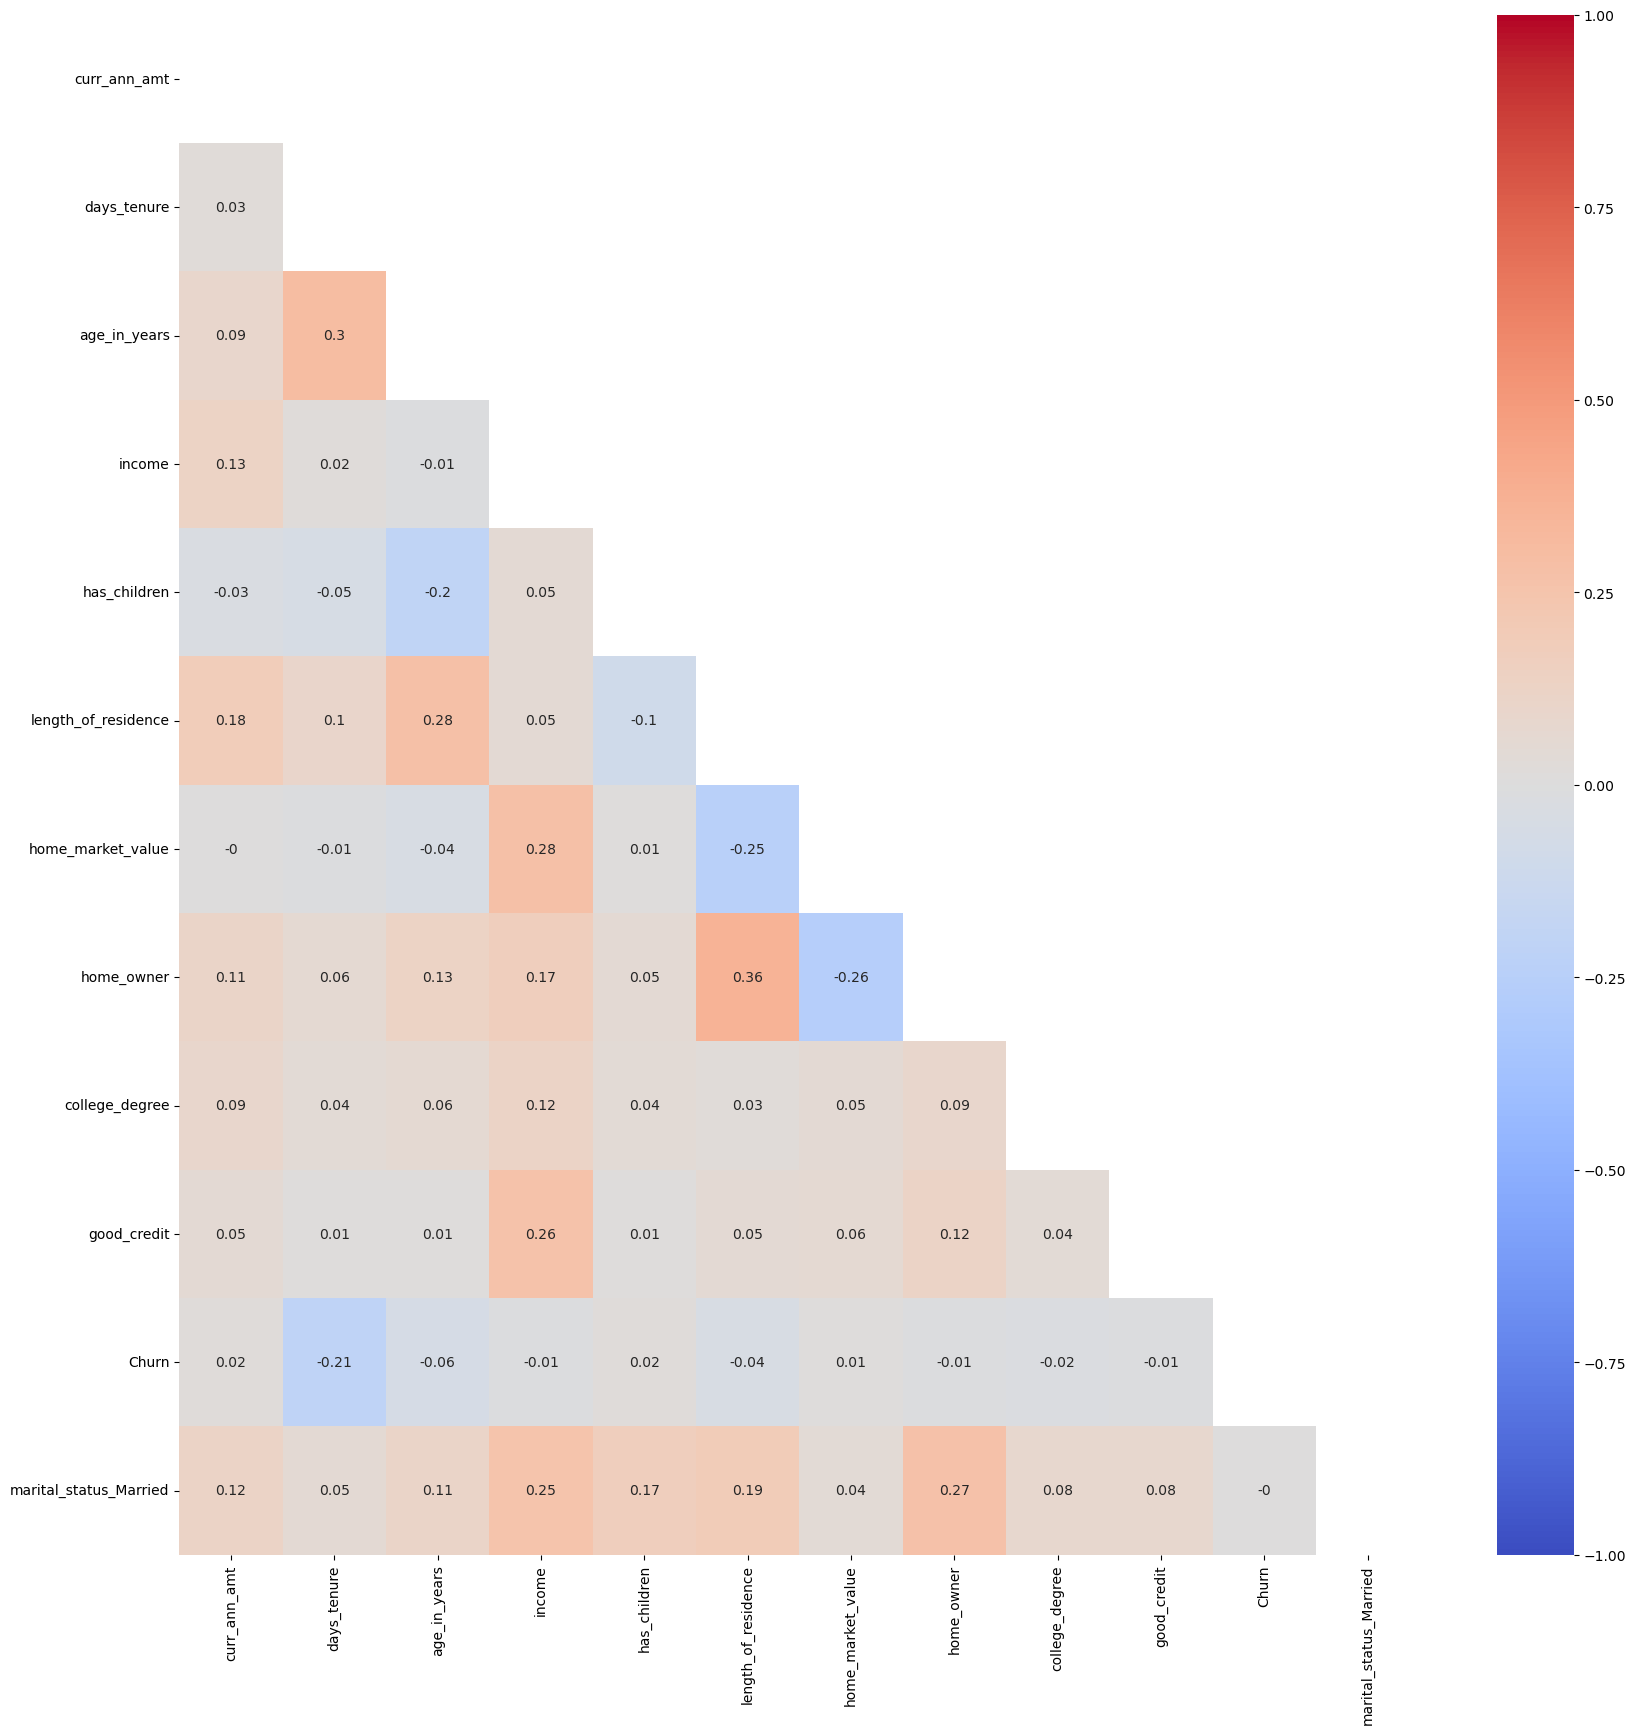

In [123]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

There does not appear to be any additional multicollinearity, so we can move onto In-Depth EDA. 

### D. In-Depth EDA

What is most interesting is that most of the column do not have a significant correlation with the Churn column except for the days_tenure column. With a correlation of -0.21, I may need to explore days_tenure as a better measure of customer retention than Churn. 

When looking at count distrbutions for each column I like to take a 'shot gun,' approached and look at as many sub plots as possible from a high level to better plan and organize my feature engineering. 

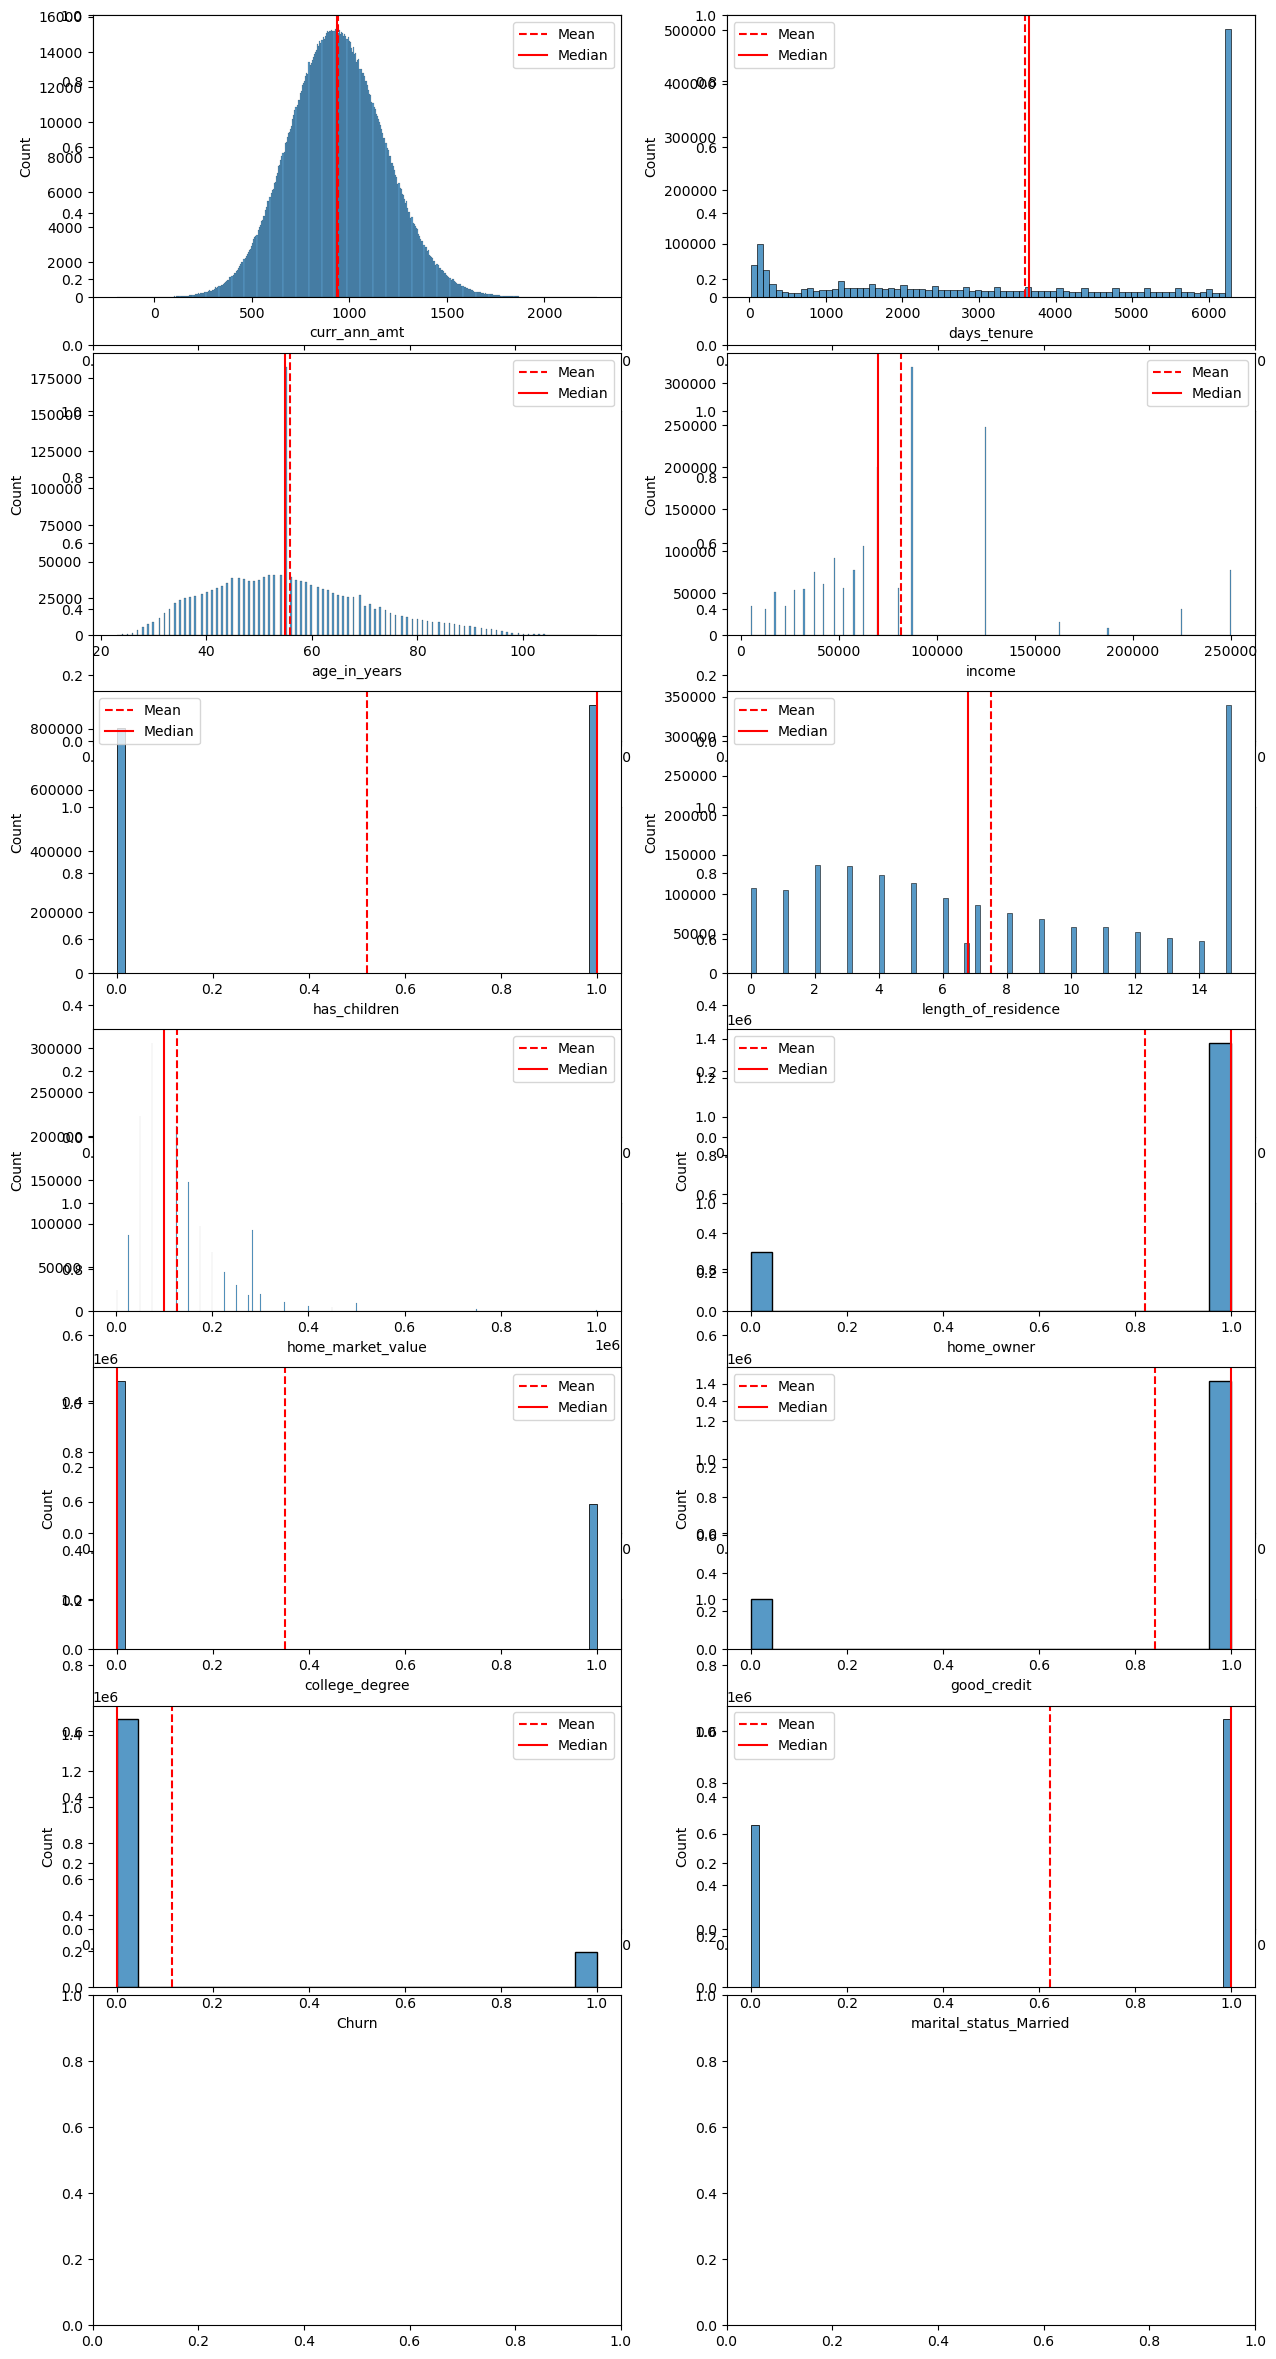

In [127]:
#Set up grid of subplots
plt.subplots(6, 2, figsize=(15, 30))

#Initialize counter
plot_num = 1

#Loop through column names in DataFrame
for col in df_auto_churn_clean.columns:
        var = df_auto_churn_clean[col]
        var_mean = var.mean()
        var_median = var.median()

        plt.subplot(7, 2, plot_num)
        sns.histplot(var)
        plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
        plt.axvline(var_median, c='r', label='Median')
        plt.legend()

        plot_num += 1

#Ensure that plots don't overlap
plt.tight_layout()

plt.show()

The findings and areas of interest below are based on the subplots and heatmaps above. 

Findings/Areas of Interest:

    1. curr_ann_amt - The only column with a very clear normal distribution. 
    
    2. days_tenure - Has ne interesting distirbution with the majoriy of days tenure being relatively flat for values between 500 and 600. Seperating this column into three groups(>500; 500-6000; <6000) will be a features to explore. 
    
    3. age_in_year - This column has a somewhat normal distrbution that is skewed right due to the natural life expectancy of humans. 
    
    4. income - Does not appear to have a normal distribution at a high level, but is still a key component of a customers ability to afford their auto insurance premium. 
    
    5. length_of_residence - Has a correlation of 0.28 with age_in_years, which is the same correlation that age_in_years has with days_tenure. (This observation has the the possible branches of a decision tree)
    
    6. avg_home_market_value - Has a strong correlation of 0.28 with income. The strong correlation is expected. 
    
    7. age_in_years and churn have both have strong correlations with days_tenure. age_in_years has a positive correlation of 0.30 and churn has a negative correlation of -021. It is expected to see the negative correlation between days_tenure and churn as they opposites of each other, where days-tenure is a measure of how long a policy has been in force, where as churn measures when a policy has been canceled. 

I was also able to determine that I will be dropping the month column does not bare any statisitical significance. Although it is perculiar to see the mean be month 7 and median month 6.5, there isn't much statisical value in this column since it is comprised of mostly 1 years worth of data. Thus, the month column will be dropped. There is some thought to also dropping the Churn column as only ~11% of its values are True. However, I may do some exploration of a subset of the overall dataframe based on just looking at all for that ~11% churned. I may go step further and compare it to an analysis of the whole data frame. For now, I will explore the relationship between Churn and predictive(continous dtype) columns. 

Based on the analysis above, I will save the list of columns I find to be predictive as a list and define the dependent variable, which in this case will be 'churn'. Then I will create subplots to visualize the relationship between the predictive columns and 'churn.'

In [130]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
y = df_auto_churn_clean['Churn']
# visualise target vs float variable
x_options

['curr_ann_amt', 'days_tenure', 'income', 'length_of_residence']

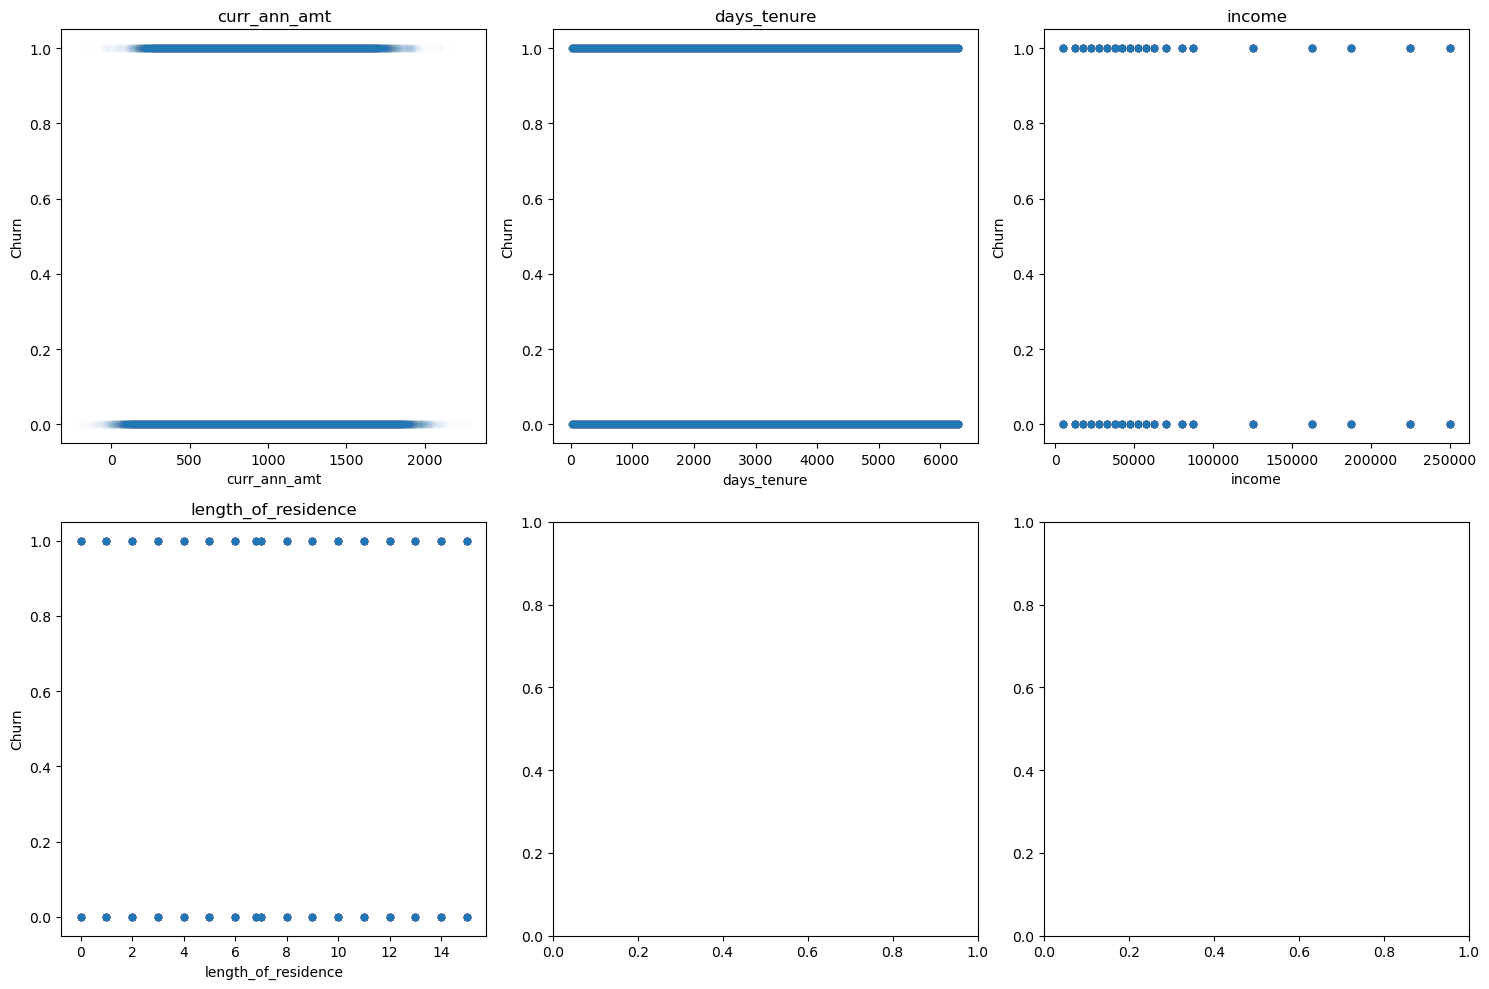

In [131]:
# visualise target vs float variable

plt.subplots(2,3,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,3,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'{col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

The relationships and distributions betwen Churn and predictive columns appears to be unclear in the sublots. This requires further investigation in future EDA. 

As mentioned prior, the days_tenure appears to be a better measure of customer retention, so lets explore the relationship between days_tenure and predictive columns. 

In [133]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options = list(df_auto_churn_clean.select_dtypes('float'))
x_options.remove('days_tenure')  # Exclude 'days_tenure' from x_options as it is our target variable. 
y = df_auto_churn_clean['days_tenure']
x_options

['curr_ann_amt', 'income', 'length_of_residence']

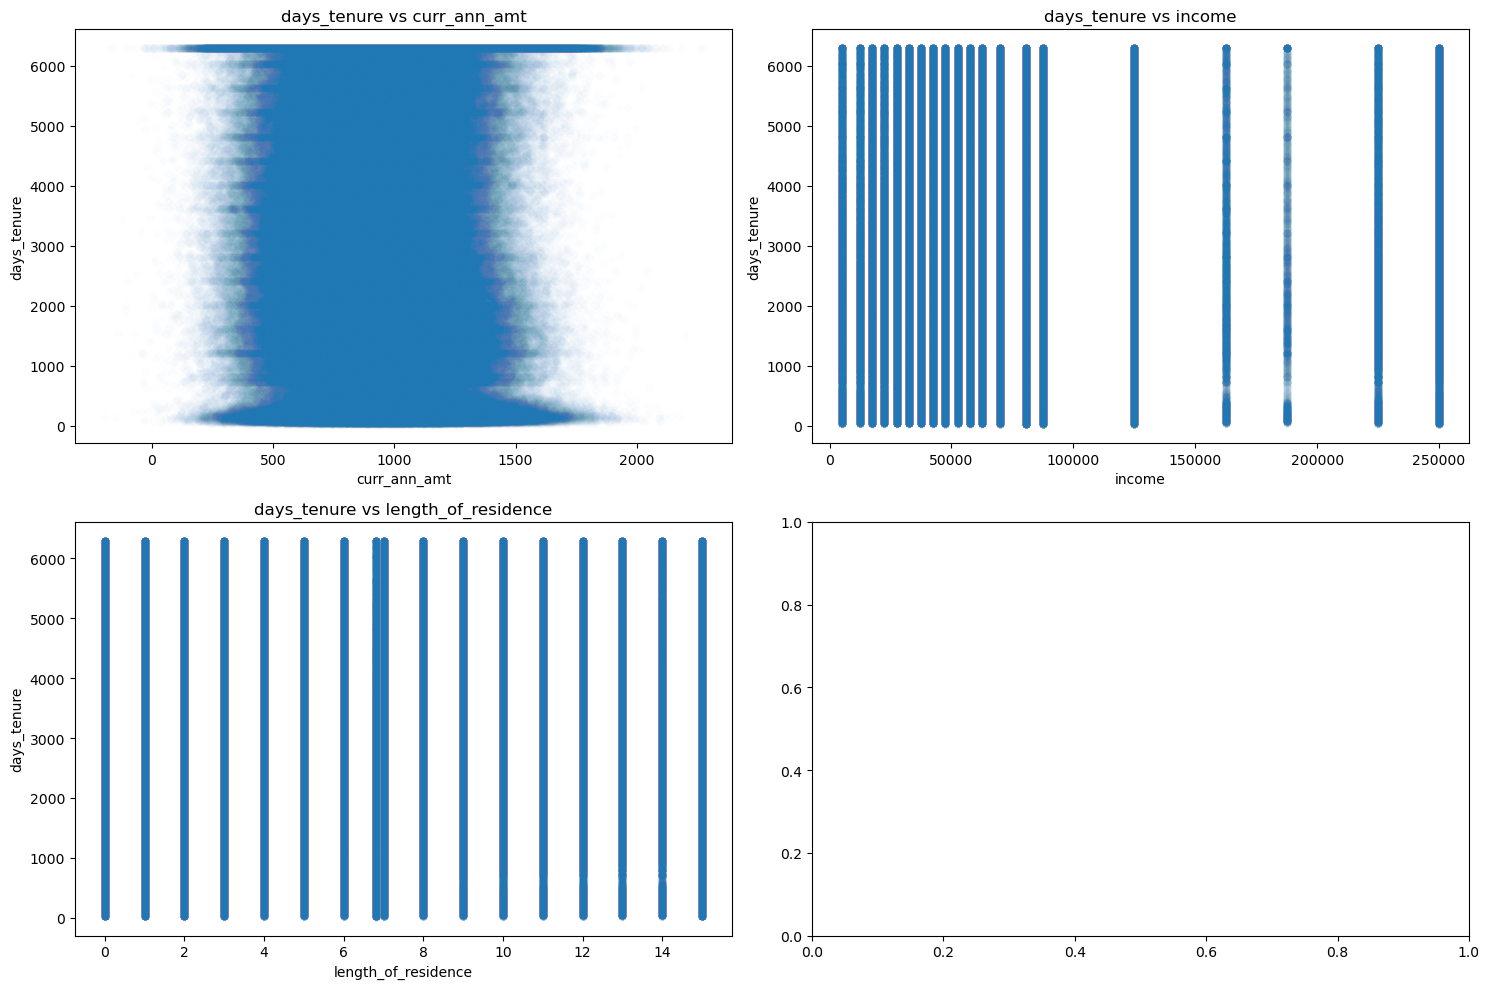

In [134]:
# visualise target vs float variable

plt.subplots(2,2,figsize=(15,10))

plot_num = 1

# loop through x_options
for col in x_options:
    plt.subplot(2,2,plot_num)
    sns.scatterplot(x=df_auto_churn_clean[col], y=y, alpha=0.01) # here alpha affects transparency
    plt.title(f'days_tenure vs {col}')

    plot_num += 1

# ensure that subplots do not overlap
plt.tight_layout()
plt.show()

Findings: 

Note: Due to hardware limitations I had challenges attempting to plot boxplots with this data set. I will may attempt boxplots with smaller subsets of data or with columns that my computer can handle. For now I will work with scatter plots even though it is hard to decern relationships and patterns with them. 

    1. days_tenure x cur_ann_ammt - It is difficult to decern what is happening in the plot. However, the broadest range of cur_ann_ammt can be observed at the early onset of days_tenure and longest days of days_tenure. It almost looks like a vertical double side version of the days_tenure histogram. 
    2. days_tenure x income - Show similar trends as days_tenure x cur_ann_ammt where the majority of plot points are skewed right. 
    3. days_tenure x length_of_residence - Revealed an issue with the quality of the data in the length_of_residence column. 
 

Now we shall continue moving forward with additional EDA. 

#### - length_of_residence EDA

In [138]:
# Print the shape of the 'length_of_residence' column
df_auto_churn_clean['length_of_residence'].shape

(1680909,)

In [139]:
# Get the unique values in the 'length_of_residence' column of the DataFrame df_auto_churn_clean
df_auto_churn_clean['length_of_residence'].unique()

array([15.   ,  2.   , 10.   ,  6.   ,  4.   ,  8.   , 12.   ,  5.   ,
       11.   ,  9.   ,  7.   ,  0.   ,  1.   ,  3.   , 13.   ,  6.801,
       14.   ], dtype=float32)

During feature engineering, I will explore the 6.801 month values to determine what to do with them.  

We wills start by plotting the distribution of all the values in the 'length_of_residence' column and then get their exact counts. 

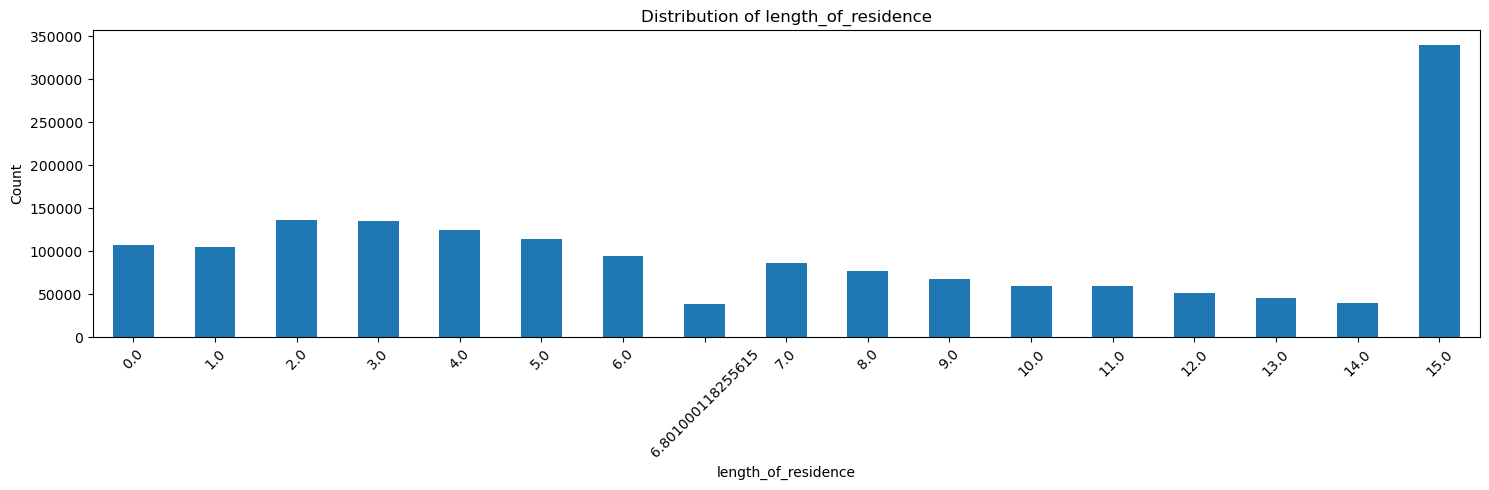

In [141]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'income' variable as a bar plot with count
ax = df_auto_churn_clean['length_of_residence'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('length_of_residence')
plt.ylabel('Count')
plt.title('Distribution of length_of_residence')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [142]:
# Filter rows where 'length_of_residence' is equal to 6.801000118255615
filtered_rows = df_auto_churn_clean[df_auto_churn_clean['length_of_residence'] == 6.801000118255615]

# Get the count of filtered rows
count_filtered_rows = filtered_rows.shape[0]

# Print the count
print(count_filtered_rows)

38290


6.801 month values are strange and make no real world sense, so all rows that contain these values will be dropped. 

In [144]:
# TODOs: Value to check for
values_to_drop = [6.801000118255615]

# Filter out rows where 'length_of_residence' is in the specified values
df_auto_churn_clean = df_auto_churn_clean[~df_auto_churn_clean['length_of_residence'].isin(values_to_drop)]

Let's check the shape and unqiue values to confirm the rows containing 6.801000118255615 have been dropped. 

In [146]:
# Print the shape of the 'length_of_residence' column
df_auto_churn_clean['length_of_residence'].shape

(1642619,)

In [147]:
# Get the unique values in the 'length_of_residence' column of the DataFrame df_auto_churn_clean
df_auto_churn_clean['length_of_residence'].unique()

array([15.,  2., 10.,  6.,  4.,  8., 12.,  5., 11.,  9.,  7.,  0.,  1.,
        3., 13., 14.], dtype=float32)

Now that those rows have been dropped, we can move onto EDA for the 'income' column.

####  - income EDA

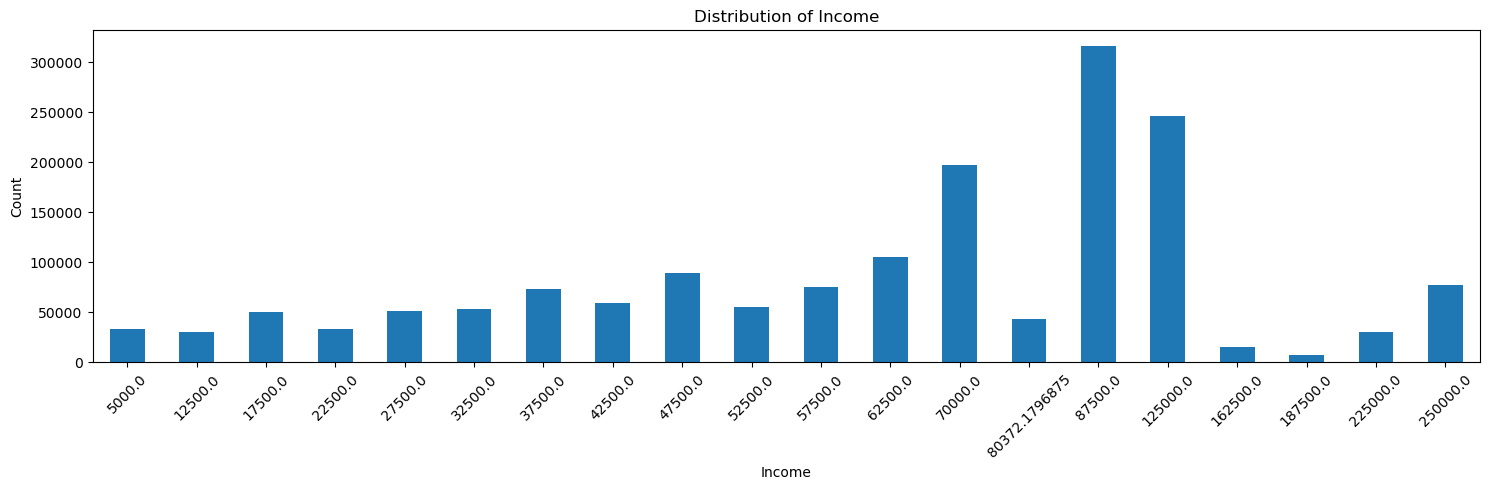

In [150]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'income' variable as a bar plot with count
ax = df_auto_churn_clean['income'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [151]:
# Calculate the mean of 'income' column. 
df_auto_churn_clean["income"].mean()

81861.38

In [152]:
# Calculate the median of 'income' column. 
df_auto_churn_clean["income"].median()

70000.0

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Large portion of customers in this data set make between $70,000 - $87,500. This makes some sense consider most people tend to achieve their heighest income later in life, which is supported by the presence of the large amoutn of 55 year old customers in the data set. The mean and median calculations above support this.
    
    2. For individuals that make $5,000. It is possible they have their cost of living supplemented somehow as $5,000 is not enough to live on, in addition to paying for auto insurance.  

Findings: 

Note: Median and Mean lines will not plot despite the calculations working just fine above. 

    1. Keeping the lower end of income in mind, those low income customer may only be able to rent. However, this dataset only has data for home owners and not renters, which may impact the modeling predictabiliy for customers that own homes versus those that do not.
    2. Distribution appears right skewed with a mean of ~$130,918 (~1.59 time more than the mean income = customers are living within their means) and median of ~$112,499((~1.58 time more than the mean income = customers are living within their means). 
    

For now lets explore the distribution of some of the columns of interest starting with age_in_years.

#### - Possible Feature Engineering age_in_years

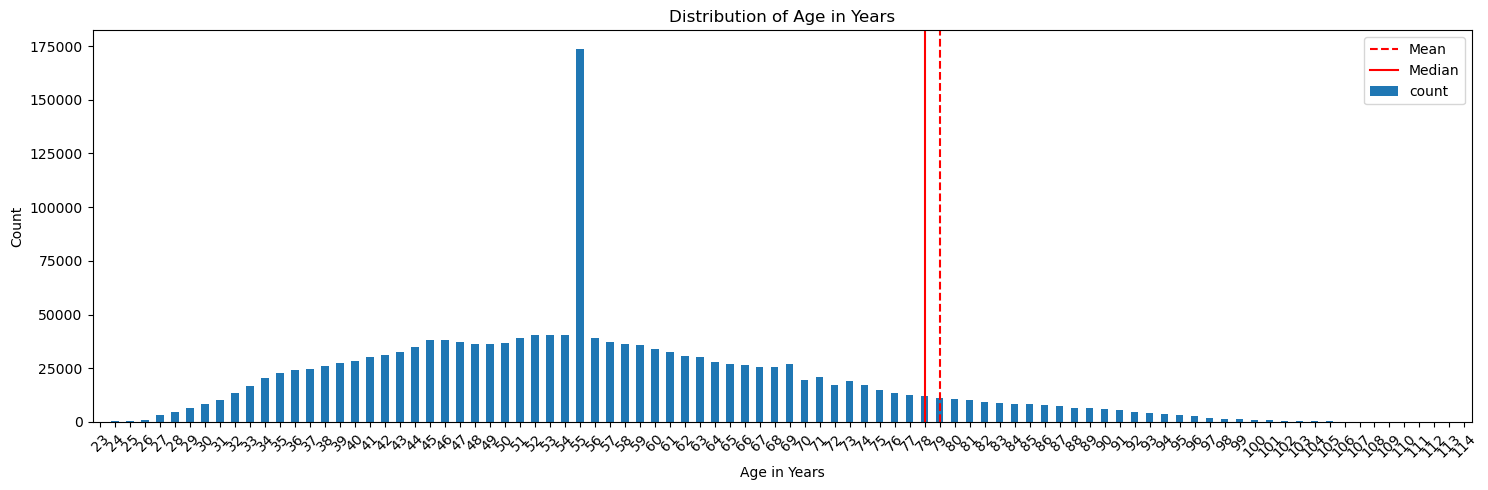

In [157]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the distribution of 'age_in_years' variable as a bar plot with count
ax = df_auto_churn_clean['age_in_years'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.title('Distribution of Age in Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot vertical lines for mean and median
var_mean = df_auto_churn_clean['age_in_years'].mean()
var_median = df_auto_churn_clean['age_in_years'].median()
plt.axvline(var_mean, c='r', label='Mean', linestyle='--')
plt.axvline(var_median, c='r', label='Median')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Findings: 

    1. Surprisingly, many customers that still retained their auto insurance even passed the age of 100. Some carriers impliment restrictions based on age or underwrite very high premiums of these these individuals as they are high risk for car accidents/claims. 
    2. A large amount of customers are age 55. (This will likely compromise the accuracy of my data.)
    3. There are a smaller amount of drivers under 35 than expected. This makes this data unreliable for predicting rention of younger customers. 
    4. The presence of individuals over the age of 90 appears to be pulling both the mean and median right. 

Based on these findings there is no additional work or analysis that needs to be done with the 'age_in_years' column. 

## 7. Final Sense Check & Heatmaps
<a class="anchor" id="part-7"></a>

Before moving forward with establishing baseline models let's do some sense checks of the Dataframe. 

We will start with checking the info of the DataFrame to ensure all dtypes are numerical and all of the desired columns are present. 

In [161]:
# Display information about df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642619 entries, 0 to 1680908
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1642619 non-null  float32
 1   days_tenure             1642619 non-null  float32
 2   age_in_years            1642619 non-null  int64  
 3   income                  1642619 non-null  float32
 4   has_children            1642619 non-null  int32  
 5   length_of_residence     1642619 non-null  float32
 6   home_market_value       1642619 non-null  int32  
 7   home_owner              1642619 non-null  int32  
 8   college_degree          1642619 non-null  int32  
 9   good_credit             1642619 non-null  int32  
 10  Churn                   1642619 non-null  int32  
 11  marital_status_Married  1642619 non-null  bool   
dtypes: bool(1), float32(4), int32(6), int64(1)
memory usage: 89.3 MB


Everything is as desire except a few dtypes need to be converted. (This is optional.)

Let's complete the following conversions below and sense check them by reviewing the DataFrame info. 

int64 to int32

In [163]:
# Identify all columns with int64 dtype
int64_columns = df_auto_churn_clean.select_dtypes(include='int64').columns

# Convert these columns to float32
df_auto_churn_clean[int64_columns] = df_auto_churn_clean[int64_columns].astype('int32')

In [164]:
# Display information about df_auto_churn_clean
df_auto_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642619 entries, 0 to 1680908
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1642619 non-null  float32
 1   days_tenure             1642619 non-null  float32
 2   age_in_years            1642619 non-null  int32  
 3   income                  1642619 non-null  float32
 4   has_children            1642619 non-null  int32  
 5   length_of_residence     1642619 non-null  float32
 6   home_market_value       1642619 non-null  int32  
 7   home_owner              1642619 non-null  int32  
 8   college_degree          1642619 non-null  int32  
 9   good_credit             1642619 non-null  int32  
 10  Churn                   1642619 non-null  int32  
 11  marital_status_Married  1642619 non-null  bool   
dtypes: bool(1), float32(4), int32(7)
memory usage: 83.0 MB


The dtype conversions were successful.

Now we will confirm that there are no missing or null values and review the Dataframe head. 

In [167]:
# Calculate the percentage of missing values in each column
100 * (df_auto_churn_clean.isna().sum(axis=0) / df_auto_churn_clean.shape[0])

curr_ann_amt              0.0
days_tenure               0.0
age_in_years              0.0
income                    0.0
has_children              0.0
length_of_residence       0.0
home_market_value         0.0
home_owner                0.0
college_degree            0.0
good_credit               0.0
Churn                     0.0
marital_status_Married    0.0
dtype: float64

There are no missing or null values. 

In [169]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_market_value,home_owner,college_degree,good_credit,Churn,marital_status_Married
0,818.877991,1454.0,44,22500.0,1,15.0,50000,1,1,1,0,True
1,974.199158,1795.0,72,27500.0,0,2.0,50000,1,0,0,0,False
2,967.375122,4818.0,55,42500.0,0,10.0,75000,1,0,0,0,True
3,992.409546,130.0,53,125000.0,1,6.0,175000,1,0,1,1,True
4,784.633484,5896.0,50,87500.0,1,4.0,225000,1,1,1,0,True


The Dataframe head looks good. 

Now let's make a heatmap. 

### Heatmap 2

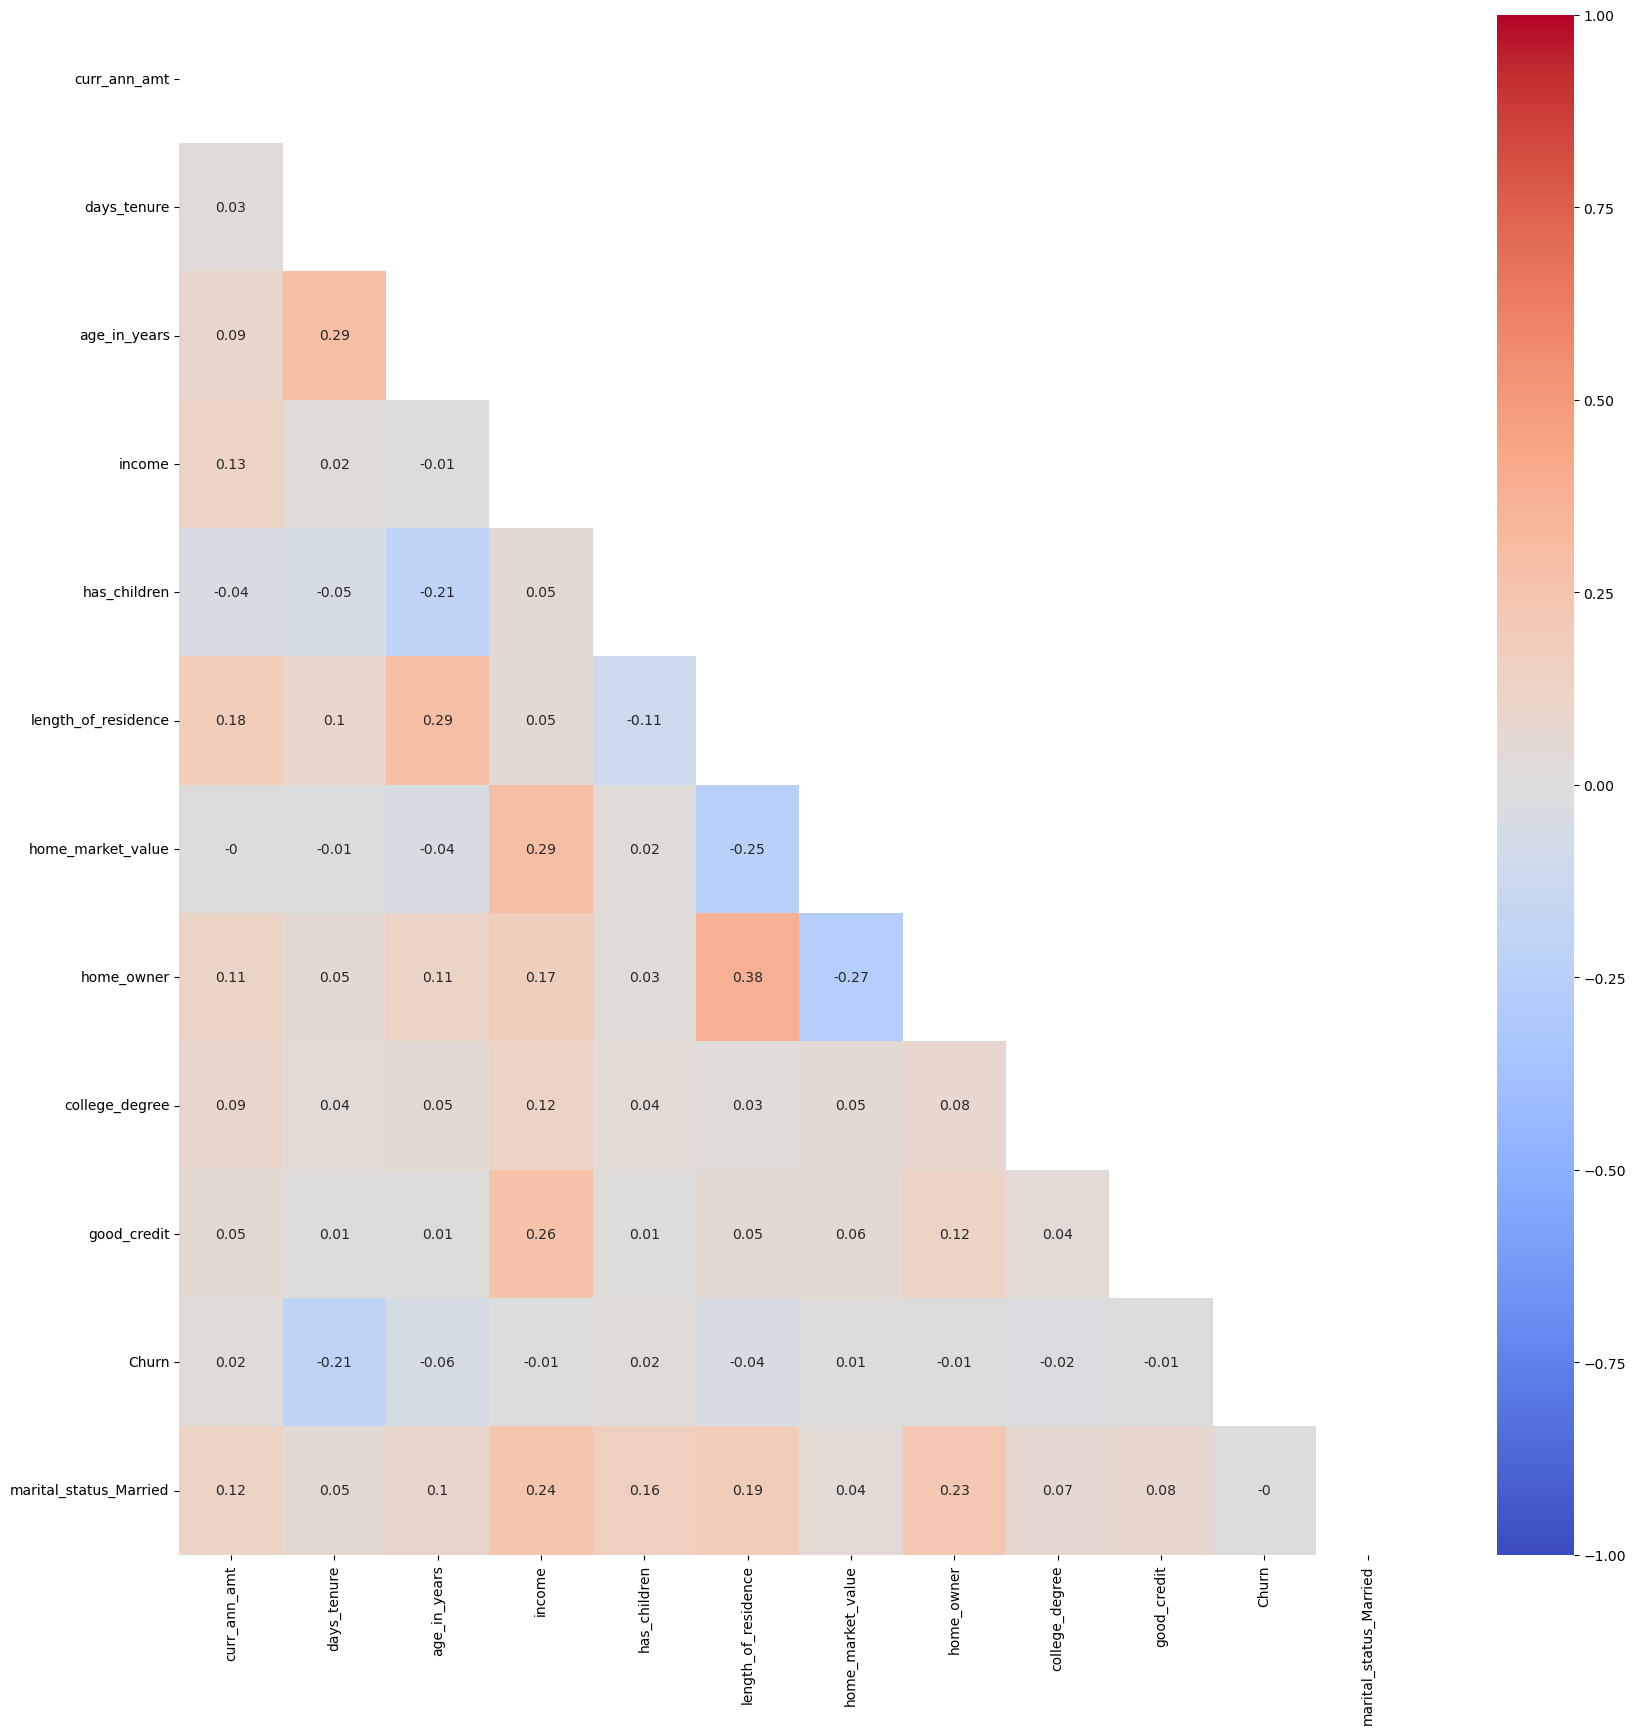

In [173]:
# Create a mask for the upper-triangular part of the correlation matrix
mask = np.triu(df_auto_churn_clean.corr())

# Define your custom colormap with the desired step count
cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=8)  # Adjust n_colors as needed

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_auto_churn_clean.corr().round(2), annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask, center=0)
plt.show()

All the collinearity relationships appear to be reasonable and none are at or beyond the 0.5/-0.5 thresholds. 

We can now save our clean DataFrame as a CSV file and then move onto baseline modeling. 

Let's save this clean, processed DataFrame into a CSV file for retention. 

In [176]:
# Save the cleaned DataFrame df_auto_days_tenure_clean to a CSV file named 'df_auto_days_tenure_clean.csv' in the 'Data' directory
df_auto_churn_clean.to_csv('Data/df_auto_churn_clean_s3.csv')

## 8. Baseline Modeling
<a class="anchor" id="part-8"></a>

Let's start the modeling by loading the new CSV file we created. We are loading a new CSV with the hopes it will help the model run.

In [179]:
# Read the CSV file 'auto_insurance_churn.csv' into the DataFrame df_raw
df_auto_churn_clean_s3 = pd.read_csv('Data/df_auto_churn_clean_s3.csv')

Now that the DataFrame has been cleaned and processed we can conduct some baseline modeling. 

We will start by first completing a test/train split on the DataFrame where we will establish our independent variables as X and dependent variables as y. 

### - Test/Train Split

We will do sense check on the DataFrame to see if the memory usage is manageable  for the hardware we are using. 

In [184]:
# Display information about df_auto_churn_clean
df_auto_churn_clean_s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642619 entries, 0 to 1642618
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1642619 non-null  int64  
 1   curr_ann_amt            1642619 non-null  float64
 2   days_tenure             1642619 non-null  float64
 3   age_in_years            1642619 non-null  int64  
 4   income                  1642619 non-null  float64
 5   has_children            1642619 non-null  int64  
 6   length_of_residence     1642619 non-null  float64
 7   home_market_value       1642619 non-null  int64  
 8   home_owner              1642619 non-null  int64  
 9   college_degree          1642619 non-null  int64  
 10  good_credit             1642619 non-null  int64  
 11  Churn                   1642619 non-null  int64  
 12  marital_status_Married  1642619 non-null  bool   
dtypes: bool(1), float64(4), int64(8)
memory usage: 152.0 MB


The memory usage is at 152.0 M, which is not a lot. However, if you wanted to save some memory, you can convert dtypes that use 64 bit memory to 32 bit. We will do this below as an exercise and then check the Dataframe's info to confirm the conversions took. 

In [186]:
# Identify all columns with float64 dtype
int64_columns = df_auto_churn_clean_s3.select_dtypes(include='int64').columns

# Convert these columns to float32
df_auto_churn_clean_s3[int64_columns] = df_auto_churn_clean_s3[int64_columns].astype('int32')

In [187]:
# Identify all columns with float64 dtype
float64_columns = df_auto_churn_clean_s3.select_dtypes(include='float64').columns

# Convert these columns to float32
df_auto_churn_clean_s3[float64_columns] = df_auto_churn_clean_s3[float64_columns].astype('float32')

In [188]:
# Display information about df_auto_churn_clean
df_auto_churn_clean_s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642619 entries, 0 to 1642618
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1642619 non-null  int32  
 1   curr_ann_amt            1642619 non-null  float32
 2   days_tenure             1642619 non-null  float32
 3   age_in_years            1642619 non-null  int32  
 4   income                  1642619 non-null  float32
 5   has_children            1642619 non-null  int32  
 6   length_of_residence     1642619 non-null  float32
 7   home_market_value       1642619 non-null  int32  
 8   home_owner              1642619 non-null  int32  
 9   college_degree          1642619 non-null  int32  
 10  good_credit             1642619 non-null  int32  
 11  Churn                   1642619 non-null  int32  
 12  marital_status_Married  1642619 non-null  bool   
dtypes: bool(1), float32(4), int32(8)
memory usage: 76.8 MB


Memory useage was reduced to 76.8 MB after a successful conversion. 

Before we move on base line modeling, let's check the shape and head of the DataFrame once more. 

In [191]:
# Print the shape of the df_auto_days_tenure_frac DataFrame
df_auto_churn_clean_s3.shape

(1642619, 13)

The DataFrame as a reasonable shape that my machine can handle. 

In [193]:
# Display the first few rows of the DataFrame to preview the data
df_auto_churn_clean_s3.head()

,Unnamed: 0,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_market_value,home_owner,college_degree,good_credit,Churn,marital_status_Married
0,0,818.877991,1454.0,44,22500.0,1,15.0,50000,1,1,1,0,True
1,1,974.199158,1795.0,72,27500.0,0,2.0,50000,1,0,0,0,False
2,2,967.375122,4818.0,55,42500.0,0,10.0,75000,1,0,0,0,True
3,3,992.409546,130.0,53,125000.0,1,6.0,175000,1,0,1,1,True
4,4,784.633484,5896.0,50,87500.0,1,4.0,225000,1,1,1,0,True


A new column is present in the Dataframe that is titled 'Unnamed: 0'. Based on the DataFrame head, it has not business value, so we will drop it. 

In [195]:
# Dropping 'Unnamed: 0' column
df_auto_churn_clean_s3.drop(columns='Unnamed: 0', inplace=True)

Let's conduct the Test/Train split and scale the data while we are doing it. We are scaling the data as not all the values in the DataFrame are in the same ranges, so scaling will help to put all the data on the same scale over measurement. This can help with model accuracy. 

Let's check the DataFrame info to ensure the column was dropped. 

In [198]:
# Display information about df_auto_churn_clean
df_auto_churn_clean_s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642619 entries, 0 to 1642618
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   curr_ann_amt            1642619 non-null  float32
 1   days_tenure             1642619 non-null  float32
 2   age_in_years            1642619 non-null  int32  
 3   income                  1642619 non-null  float32
 4   has_children            1642619 non-null  int32  
 5   length_of_residence     1642619 non-null  float32
 6   home_market_value       1642619 non-null  int32  
 7   home_owner              1642619 non-null  int32  
 8   college_degree          1642619 non-null  int32  
 9   good_credit             1642619 non-null  int32  
 10  Churn                   1642619 non-null  int32  
 11  marital_status_Married  1642619 non-null  bool   
dtypes: bool(1), float32(4), int32(7)
memory usage: 70.5 MB


Since the Dataframe is in good order, we can move onto completing our Test/Train split. You will notice some cells commented out. They are commented on because during post-gridsearch model evaluation there was a significant imbalance in data sampling, which resulted in poorer performance for a tuned model versus the baseline. The data was resampled using SMOTE/RandomUnderSampler, ADASYN/RandomUnderSampler and SMOTEENN techniques. 

After experiments with all three techniques, SMOTEENN was found to be the most beneficial. However, the data imbalance was not completely remedied. Nevertheless, we will move forward with SMOTEENN for our Test/Train split. 


#### * Sampling Techniques / Troubleshooting

In [ ]:
'''
# Extract features (X) and target (y) from df_auto_days_tenure_clean_s3
y = df_auto_churn_clean_s3['Churn']
X = df_auto_churn_clean_s3.drop(['Churn'], axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy='minority', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create a pipeline with SMOTE and RandomUnderSampler
resampling_pipeline = ImPipeline([
    ('smote', smote),
    ('under_sampler', under_sampler)
])

# Apply SMOTE followed by undersampling to the training data
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

In [ ]:
'''
# Extract features (X) and target (y) from df_auto_days_tenure_clean_s3
y = df_auto_churn_clean_s3['Churn']
X = df_auto_churn_clean_s3.drop(['Churn'], axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize ADASYN and RandomUnderSampler
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create a pipeline with ADASYN and RandomUnderSampler
resampling_pipeline = ImPipeline([
    ('adasyn', adasyn),
    ('under_sampler', under_sampler)
])

# Apply SMOTE followed by undersampling to the training data
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

Here we will conduct our Test/Train split using the SMOTEENN sampling strategy.

In [292]:
# Extract features (X) and target (y) from df_auto_churn_clean_s3
y = df_auto_churn_clean_s3['Churn']
X = df_auto_churn_clean_s3.drop(['Churn'], axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize SMOTEENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Apply SMOTEENN to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

Let's print the shape and summary statistics to confirm the split was done correctly. 

In [202]:
print(f'X_resampled shape: {X_resampled.shape}')
print(f'y_resampled shape: {y_resampled.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_resampled shape: (1274256, 11)
y_resampled shape: (1274256,)
X_test shape: (492786, 11)
y_test shape: (492786,)


Now that the DataFrame has been split we can move on to some baseline modeling. 

### - Logistic Model

For our baseline modeing we will conduct a logistic model. If the accuracy is reasonable we will then move on to doing a XG Boost and a Desicision tree. 

In [203]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression(random_state=42)

# Fitting to original data
my_logreg.fit(X_resampled,y_resampled)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_resampled, y_resampled)}')
print(f'Test Score: {my_logreg.score(X_test, y_test)}')

Train Score: 0.6874701786768121
Test Score: 0.5829792242474421


The Train and Test Scores for this model are still poor, but better than the results from Sprint 2. The Train Score is better than our Test Score with a difference of 0.10. This difference suggests the model performs generally poorly and there may be over fitting. We will attempt to improve both scores in the Model Optimization section. 

Let's move on to XG Boost. You will notice there is some model evaluation occurring for this baseline. During the post-gridsearch model evaluation, XG Boost was found to be the best model. However, the classification report led to the discovery of data set imbalances. Thus, the entire 'Baseline Modeling' and 'Model Optimization' sections were rerun as a resampling of the data using the SMOTEENN sampling strategy to correct the data imbalance. The present model evaluation techniques will remain in the 'Baseline Modeling' section as support for the 'Model Evaluation' section. 

### - XG Boost Model

In [204]:
# Initialize the XGBoost classifier with a max_depth of 6
xgb_model = xgb.XGBClassifier(max_depth=6, n_estimators=100, random_state=42)

# Fit the model on the scaled training data
xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the training data
y_train_pred = xgb_model.predict(X_resampled)

# Make predictions on the test data
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model on the resampled training data
train_accuracy = accuracy_score(y_resampled, y_train_pred)
train_classification_report = classification_report(y_resampled, y_train_pred)
train_confusion_matrix = confusion_matrix(y_resampled, y_train_pred)

# Evaluate the model on the original test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate ROC AUC for binary classification
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Output the results
print(f"Train Classification Report:\n{train_classification_report}")
print(f"Test Classification Report:\n{test_classification_report}")

# ROC AUC Score
print(f"Test ROC AUC Score: {test_roc_auc:}")
print(f"Train Score: {train_accuracy:}")
print(f"Test Score: {test_accuracy:}")

Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    554851
           1       0.98      0.88      0.93    719405

    accuracy                           0.92   1274256
   macro avg       0.92      0.93      0.92   1274256
weighted avg       0.93      0.92      0.92   1274256

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    436134
           1       0.46      0.45      0.45     56652

    accuracy                           0.88    492786
   macro avg       0.69      0.69      0.69    492786
weighted avg       0.87      0.88      0.87    492786

Test ROC AUC Score: 0.6905387717214448
Train Accuracy: 0.9221310317550006
Test Accuracy: 0.8753556310447131


Based on the Train and Test Accuracy scores, the XG Boost model performs very well. However, based on the classification report, there are still issues with the models for reliability and accurately predicting the likelihood of customer churn. The Classification report will be discussed in depth in the 'Model Evaluation' section. 

Based on the ROC AUC Score of 69%, the model accurately predicted whether an auto policy was canceled or remained active 69% of the time. This result suggests that the model is still performing poorly and will need some improvement. 

Let's try another model.

### - Decision Tree Model

In [346]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the scaled training data
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)

# Fit the model on the training data
clf.fit(X_resampled, y_resampled)

# Print the training score
train_score = accuracy_score(y_resampled, clf.predict(X_resampled))

# Predict on the test data
y_pred_test = clf.predict(X_test)

# Print the test score
test_score = accuracy_score(y_test, y_pred_test)

# Print the cross-validation scores and the mean score
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

Cross-validation scores: [0.76576994 0.92910367 0.93105383 0.93010426 0.92987667]
Mean cross-validation score: 0.8971816741782946
Training Score: 1.0
Test Score: 0.7958647364170248


We can see the cross-validation scores are relatively close to each other after the first fold, which indicates that the model accuracy is consistent across different data splits after the first fold. This is a cause for concern as the first, fold score is significantly lower than the rest of the scores, which is likely related to the data imbalance issue mentioned earlier. 

The Mean cross-validation of 0.8971... is good, but it is not as good as our XG Boost model scores.



Nevertheless, we shall see if we can optimize these models to see if we can improve our scores. 

## 9. Model Optimization
<a class="anchor" id="part-9"></a>

In order to optimize our models, we must create a pipeline to streamline  data pre-processing, model training and post-processing steps. After we have established a pipeline for our desired model, we will conduct a grid search to determine the optimal combination of hyperparameters for our desired model. We can take a unified approach by creating a general pipeline structure and then define our parameter grids in a dictionary for each model. However, when running the code with this approach, I found the period of computational work to be lengthy, in excess of 8hrs. Therefore, I will set up a pipeline and grid for each of the following models individually and save the discussion of the gridsearch results for the end of the 'Model Optimization' section.

Logistic Regression

XG Boost

Decision Tree

SVC - A grid search took too long for this model, so we will use a randomized search instead. Update: A randomized search also took to long, so we will comment out the SVC section and continue with the project. SVC can be done in the future with a more powerful machine. 

KNN

### - Logistic Model Optimization

In [206]:
# Define a pipeline for the # Define a pipeline for the XG Boost model
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', LogisticRegression(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_grid_logreg = {
    'scaler': [StandardScaler(), None],
    'dim_reducer': [PCA(), KernelPCA()],
    'dim_reducer__n_components': [2, 3],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
}

In [207]:
# Grid search for Logistic Regression
start_time_logreg = time.time()
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, n_jobs=-1)
fitted_logreg = grid_logreg.fit(X_resampled, y_resampled)
end_time_logreg = time.time()
print(f"Logistic Regression Grid Search Duration: {end_time_logreg - start_time_logreg} seconds")

Logistic Regression Grid Search Duration: 147.84430837631226 seconds


In [208]:
# Print best parameters and models for Logistic Regression
print(f"Best parameters for Logistic Regression: {grid_logreg.best_params_}")
print(f"Best model for Logistic Regression: {grid_logreg.best_estimator_}")

Best parameters for Logistic Regression: {'dim_reducer': PCA(), 'dim_reducer__n_components': 3, 'model__C': 0.001, 'model__penalty': 'l2', 'scaler': None}
Best model for Logistic Regression: Pipeline(steps=[('scaler', None), ('dim_reducer', PCA(n_components=3)),
                ('model', LogisticRegression(C=0.001, random_state=42))])


### - XG Boost Model Optimization

In [209]:
# Define a pipeline for the XG Boost model
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', XGBClassifier(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_grid_xgb = {
    'scaler': [StandardScaler()],
    'dim_reducer': [PCA()],
    'dim_reducer__n_components': [2, 3],
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6]
}

In [210]:
# Grid search for XGBoost
start_time_xgb = time.time()
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=-1)
fitted_xgb = grid_xgb.fit(X_resampled, y_resampled)
end_time_xgb = time.time()
print(f"XGBoost Grid Search Duration: {end_time_xgb - start_time_xgb} seconds")

XGBoost Grid Search Duration: 414.2089500427246 seconds


In [219]:
# Print best parameters and models for XGBoost
print(f"Best parameters for XGBoost: {fitted_xgb.best_params_}")
print(f"Best model for XGBoost: {fitted_xgb.best_estimator_}")

Best parameters for XGBoost: {'dim_reducer': PCA(), 'dim_reducer__n_components': 3, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'scaler': StandardScaler()}
Best model for XGBoost: Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=3)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                  

### - Decision Tree Model Optimization

In [221]:
# Define a pipeline for the Decision Tree model
pipe_dtree = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_grid_dtree = {
    'scaler': [StandardScaler(), None],
    'dim_reducer': [PCA(), KernelPCA()],
    'dim_reducer__n_components': [2, 3],
    'model__max_depth': [None, 2, 4],
    'model__min_samples_leaf': [1, 5]
}

In [223]:
# Grid search for Decision Tree
start_time_dtree = time.time()
grid_dtree = GridSearchCV(pipe_dtree, param_grid_dtree, cv=5, n_jobs=-1)
fitted_dtree = grid_dtree.fit(X_resampled, y_resampled)
end_time_dtree = time.time()
print(f"Decision Tree Grid Search Duration: {end_time_dtree - start_time_dtree} seconds")

Decision Tree Grid Search Duration: 183.94196581840515 seconds


In [224]:
# Print best parameters and models for Decision Tree
print(f"Best parameters for Decision Tree: {grid_dtree.best_params_}")
print(f"Best model for Decision Tree: {grid_dtree.best_estimator_}")

Best parameters for Decision Tree: {'dim_reducer': PCA(), 'dim_reducer__n_components': 3, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'scaler': None}
Best model for Decision Tree: Pipeline(steps=[('scaler', None), ('dim_reducer', PCA(n_components=3)),
                ('model', DecisionTreeClassifier(random_state=42))])


### - SVC Model Optimization

In [ ]:
'''
# Define a pipeline for the SVC model
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', SVC(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_dist_svc = {
    'scaler': [StandardScaler(), None],
    'dim_reducer': [PCA()],
    'dim_reducer__n_components': [2, 3],
    'model__gamma': [0.01, 1, 10],
    'model__C': [0.01, 1, 10]
}

In [ ]:
'''
# Randomized search for SVC
start_time_svc = time.time()
random_search_svc = RandomizedSearchCV(pipe_svc, param_distributions=param_dist_svc, n_iter=10, cv=5, n_jobs=-1, random_state=42)
fitted_svc = random_search_svc.fit(X_resampled, y_resampled)
end_time_svc = time.time()
print(f"SVC Randomized Search Duration: {end_time_svc - start_time_svc} seconds")

### - KNN Model Optimization

In [225]:
# Define a pipeline for the KNN model
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', KNeighborsClassifier())
])

# Define a parameter grid for hyperparameter tuning
param_grid_knn = {
    'scaler': [StandardScaler(), None],
    'dim_reducer': [PCA(), KernelPCA()],
    'dim_reducer__n_components': [2, 3],
    'model__n_neighbors': [3, 5],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

In [226]:
# Grid search for KNN
start_time_knn = time.time()
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)
fitted_knn = grid_knn.fit(X_resampled, y_resampled)
end_time_knn = time.time()
print(f"KNN Grid Search Duration: {end_time_knn - start_time_knn} seconds")

KNN Grid Search Duration: 259.9075057506561 seconds


In [227]:
# Print best parameters and models for KNN
print(f"Best parameters for KNN: {grid_knn.best_params_}")
print(f"Best model for KNN: {grid_knn.best_estimator_}")

Best parameters for KNN: {'dim_reducer': PCA(), 'dim_reducer__n_components': 2, 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance', 'scaler': None}
Best model for KNN: Pipeline(steps=[('scaler', None), ('dim_reducer', PCA(n_components=2)),
                ('model',
                 KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'))])


### -Model Optimization Unified Results

In [228]:
results = {
    'Logistic Regression': {
        'best_score': grid_logreg.best_score_,
        'best_params': grid_logreg.best_params_,
        'best_model': grid_logreg.best_estimator_
    },
    'XGBoost': {
        'best_score': grid_xgb.best_score_,
        'best_params': grid_xgb.best_params_,
        'best_model': grid_xgb.best_estimator_
    },
    'Decision Tree': {
        'best_score': grid_dtree.best_score_,
        'best_params': grid_dtree.best_params_,
        'best_model': grid_dtree.best_estimator_
    },
    #'SVC': {
        #'best_score': grid_svc.best_score_,
        #'best_params': grid_svc.best_params_,
        #'best_model': grid_svc.best_estimator_
   # },
    'KNN': {
        'best_score': grid_knn.best_score_,
        'best_params': grid_knn.best_params_,
        'best_model': grid_knn.best_estimator_
    }
}

for model_name, model_info in results.items():
    print(f"{model_name} Model:")
    print(f"Best Training Score: {model_info['best_score']}")
    
    # Evaluate the model on the test data
    best_model = model_info['best_model']
    test_score = best_model.score(X_test, y_test)
    print(f"Best Test Score: {test_score}\n")

Logistic Regression Model:
Best Training Score: 0.6792481296165591
Best Test Score: 0.5578100838903702

XGBoost Model:
Best Training Score: 0.6861878791605245
Best Test Score: 0.6243541821399147

Decision Tree Model:
Best Training Score: 0.8970850458504891
Best Test Score: 0.6884489413254435

KNN Model:
Best Training Score: 0.8972239456292161
Best Test Score: 0.6668026283214215



## 10. Model Evaluation
<a class="anchor" id="part-10"></a>

Based on the scores above, we can conclude that XG Boost is the best tuned model.

This is the case because the following reasons.<br>
-Logistic Regression performed the worst of all 4 models.<br>
-Decision Tree and KNN have a large disparity between their train and test scores, which is a sign of overfitting.<br>
-XG Boost has the highest and most balanced scores of all 4 models. 

In [242]:
# Define a pipeline for the XG Boost model
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
     ('dim_reducer', PCA(n_components=3)),
    ('model', XGBClassifier(random_state=42, learning_rate=0.2, max_depth=6, n_estimators=200))
])

# Fit the model on the scaled training data
pipe_xgb.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = pipe_xgb.predict(X_test)

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Calculate ROC AUC for binary classification
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# ROC AUC Score
print(f"Test ROC AUC Score: {test_roc_auc:}")
# Evaluate the model
print(f'Train Score: {pipe_xgb.score(X_resampled, y_resampled )}')
print(f'Test Score: {pipe_xgb.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0       0.92      0.63      0.75    436134
           1       0.17      0.58      0.26     56652

    accuracy                           0.62    492786
   macro avg       0.55      0.61      0.51    492786
weighted avg       0.83      0.62      0.69    492786

Test ROC AUC Score: 0.6905387717214448
Train Score: 0.6919002147135269
Test Score: 0.6243541821399147


The tuned XG Boost performance is lower than our Baseline XG Boost. This abnormal performance is the case even after attempting ensemble implementation and sampling using varying techniques. Based on researching the causes of this, it is likely that the dimensional reducer either caused a loss of important information or emphasized noise in the data. Further, exploration and experimentation with features, models, sampling techniques and hyperparameter optimization will be needed to explore this issue further. In the meantime, we will proceed with our baseline XG Boost Model for the duration of this project. 

## - Classification Report & Confusion Matrix Evaluation

In [308]:
# Define a pipeline for the XG Boost model
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42, max_depth=6, n_estimators=200))
])

# Fit the model on the scaled training data
pipe_xgb.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = pipe_xgb.predict(X_test)

# Calculate ROC AUC for binary classification
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Convert to a DataFrame
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Policy Still Active", "Predicted Policy Cancellation"],
    index=["Actual Policy Still Active","Actual Policy Cancellation"]
)

display(cf_df)

,Predicted Policy Still Active,Predicted Policy Cancellation
Actual Policy Still Active,405636,30498
Actual Policy Cancellation,31157,25495


Based on the table we can decern the following:

I have decribed the results in three ways for each case to confirm to the varying way people can understanding these results. 

Please keep in mind the following. 
Active status refers to anm auto policy not being canceled. 
'Churn' or canceled status refers to an auto policy being canceled.

1.

405,636 of our predicted active policies were in fact active.  

31,157 of our predicted active polices were in fact canceled.  

30,498 of our predicted canceled polices were in fact active. 

25,495 of our predicted canceled polices were in fact canceled. 

2.

(405,636 scores = True Positive) 

(31,157 scores = False Positive) Based on the True Positive and False Positive ratios the model is good at predicting active policies. 

(30,498 scores = False Negative) 

(25,495 scores = True Negative) Based on the True Negative and False Negative ratios the model does poorly when predicting canceled policies. 

3.

For those that are visual, below is a plot of the confusion matrix. 

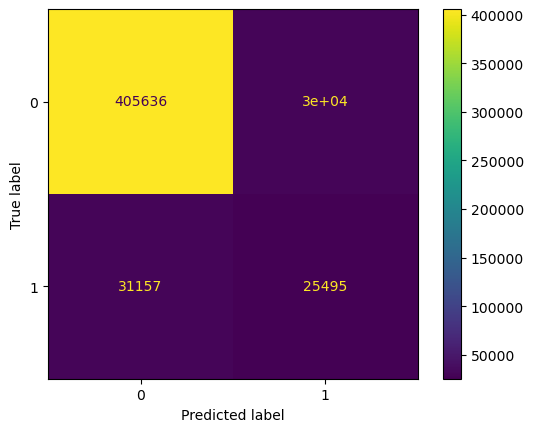

In [306]:
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [299]:
# Print detailed classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
print(f"Test ROC AUC Score: {test_roc_auc:}")

# Evaluate the model
print(f'Train Score: {pipe_xgb.score(X_resampled, y_resampled )}')
print(f'Test Score: {pipe_xgb.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    436134
           1       0.46      0.45      0.45     56652

    accuracy                           0.87    492786
   macro avg       0.69      0.69      0.69    492786
weighted avg       0.87      0.87      0.87    492786

Test ROC AUC Score: 0.6905387717214448
Train Score: 0.9249538554262252
Test Score: 0.8748848384491442


Let's discuss each metric of the classification report. 

Please keep in mind the following. 
0 refers to the customer retaining their auto policy, also known as active status. 
1 refers to the customer's auto policy being cancelled status, also known as 'Churn'.

_______________________________
PRECISION

Precision measures our model's ability to identify all auto policies were actually still active or canceled respectively. 

0 Precision: 93% of active policies were accurately predicted to be active. 
1 Precision: 46% of canceled policies were accurately predicted to be canceled.
Since our 1 Precision is lower than our 0 Precision, it is clear our model struggles to accurately predits truly canceled policies better than truly active policies. 

Precision macro avg vs Precision weighted avg: Precision Macro and Precision weighted averages ar6975% an8776% respectively, so our model do not performinges well with the current distribution of classes. 

_________________________________________________________________________________________________________________
RECALL

Recall measures our model's ability to correctly identify all auto policies were still active or canceled. However, this also includes false positive reviews and false negative reviews. 
0 Recall: 93% otheipolicy statusesws were accurately predicted.
1 Recall: 45% otheipolicy statusesws were accurately predicted.
Similar to our Precision metrics above indicated, our Recall metrics indicate that our modestruggles to l accurately preditcanceled policies better than truly active policiesws, bis this includes false positive reviews and false negative reviews. 

Recall macro avg vs Recall weighted avg: Recall Macro and Recall weighted averages ar6975% an8776% respectively, so our mod our model does not performing well with the current distribution of classes,s, which is the same case as our Precision Macro and Precision weighted averages.

_________________________________________________________________________________________________________________
F1-SCORE

F1-score is the mean of Precision and Recall.
0 F1-score: All in all our model predict9371% oactivevpoliciesws accurately. 
1 F1-score: All in all our model predict4579% ocanceled policiesws accurately.  
F1-score macro avg vs F1-score weighted avg: Since F1-score is the mean of our Precision and Recall, it is expected that our F1-score macro avg and F1-score weighted are equal to the macro avg and weight avg for both Precision and Recall as the respective values for Precision and Recall are the same. 

Based on the F1-score the overall accuracy of our model i8776% in accurately predictinactiveve ancanceledvpolicesws. 

_________________________________________________________________________________________________________________
SUPPORT

Supports are just the count of variables in the test. 
0 Support: The count of all variables in test foactive policiesws.
1 Support: The count of all variables in test focanceledvpoliciesws. 
accuracy Support: The count of all variables in test. 
macro avg Support: The count of all variables in test. 
weighted avg Support: The count of all variables in test.

## 11. Conclusion & Recommendation
<a class="anchor" id="part-11"></a>

Below you will see the count of our target variable's unique values. It is clearly imbalanced and so it is no surprise we are experiencing issues with our model ability to predict 'Churn' more than active policies. Despite implementing some sampling strategies, our models still need more work to remedy the data imbalance. It may be the case that we need a data set with more customers that churn. Nevertheless, another angle to approach this project would be to use days_tenure as the target variable for modeling. Since this variable is continuous, it would be best to use linear regression models, decision tree, KNN and XG Boost. 

In [331]:
print(df_auto_churn_clean['Churn'].value_counts())

Churn
0    1453916
1     188703
Name: count, dtype: int64
